In [1]:
from google.colab import drive
drive.mount('/content/drives/', force_remount=True)

Mounted at /content/drives/


In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>MOD (Mother of Dataset)</b></marquee>

# Churn Prediction
### Oleh Kelompok MOD (Mother of Dataset):
 * Ashadah
 * Christoforus Venus
 * Dicky Novanda Syaifullah
 * Donny Prayudha Stannia
 * Jason Joseph Tjiadi
 * Ryan Setiawan
 * Syafiqa Pramunadipta
 * Tri Oktavia Saraswati

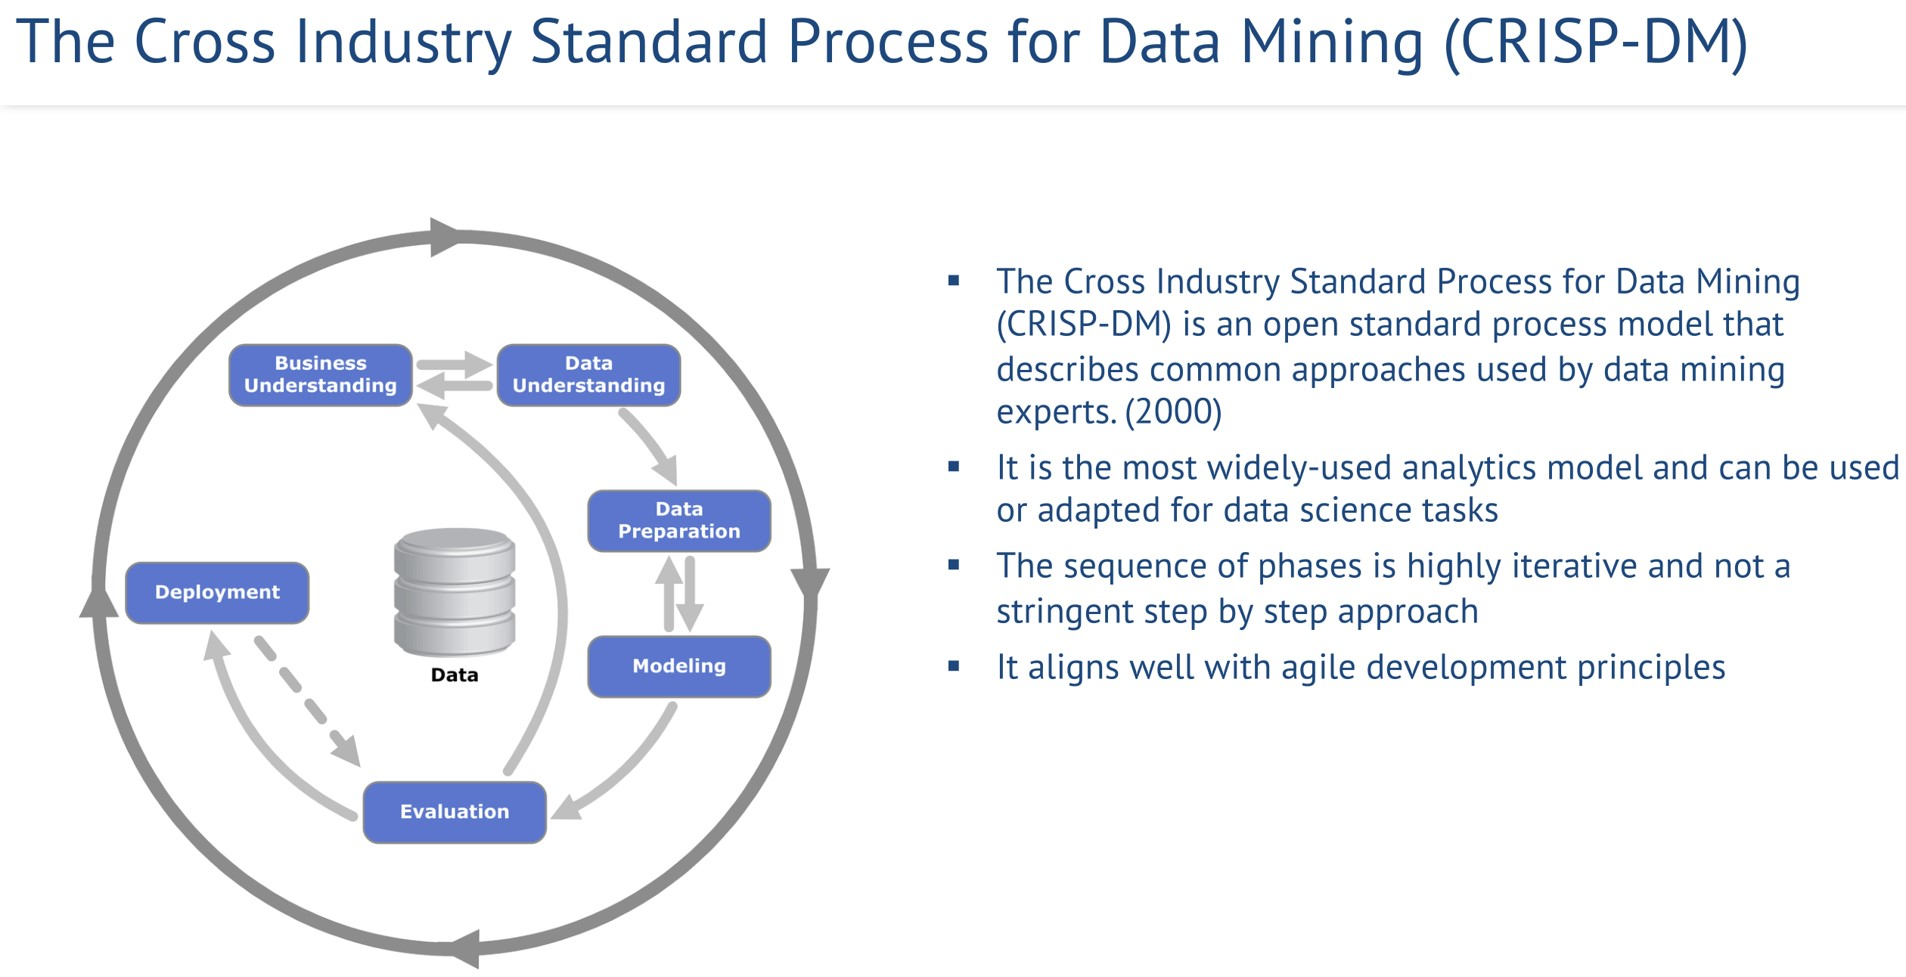

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/drives/My Drive/Colab Notebooks/CRISP_DM.jpg', cv2.IMREAD_UNCHANGED)

cv2_imshow(img)

## CRISP-DM (Cross Industry Standard Process for Data Mining) Methodology 
Metodologi CRISP-DM menyediakan pendekatan terstruktur untuk merencanakan proyek penambangan data, yang biasa juga digunakan untuk proyek data science. 

Enam langkah pada metodologi CRIPSP-DM adalah:
1.  **Business understanding**: berfokus pada pemahaman tujuan dan persyaratan proyek dari perspektif bisnis, dan kemudian menerjemahkan informasi ini ke dalam definisi masalah Ilmu Data.
2.  **Data understanding**: berfokus pada pengumpulan dan pengenalan data; ini relevan untuk mengidentifikasi masalah kualitas data, menemukan wawasan pertama ke dalam data dan membentuk hipotesis.
3.  **Data preparation**: bertujuan untuk mengubah data mentah menjadi kumpulan data akhir yang dapat digunakan sebagai input untuk teknik pemodelan (misalnya, algoritma Machine Learning).
4.  **Modeling**: melibatkan penerapan teknik pemodelan yang berbeda untuk dataset untuk menghasilkan satu set calon model.
5.  **Evaluation**: setelah model dibangun, model tersebut perlu diuji untuk memastikan model tersebut digeneralisasikan terhadap data yang tidak terlihat dan bahwa semua tujuan bisnis utama telah dipertimbangkan (misalnya, model akhir harus adil, dapat diinterpretasikan oleh manusia, dan mencapai akurasi X % lebih tinggi dari solusi klien saat ini). Hasil dari tahap ini adalah model juara.
6.  **Deployment**: model juara dikerahkan ke dalam produksi sehingga dapat digunakan untuk membuat prediksi pada data yang tidak terlihat. Semua langkah persiapan data disertakan sehingga model akan memperlakukan data mentah baru dengan cara yang sama seperti selama pengembangan model.



# Business Understanding

### Problem Statement: 
Dari data pelanggan suatu perusahaan ecommerce terdapat 16,84% pelanggan yang melakukan churn. Oleh karena itu perusahaan ingin  dapat mempertahankan konsumen agar mereka tetap setia membeli barang dari perusahaan mereka. 

### Goal:
Perusahaan perlu melakukan prediksi untuk menentukan mana pelanggan yang loyal dan tidak loyal, sehingga nantinya perusahaan dapat menentukan strategi yang tepat untuk meningkatkan loyalitas dan menurunkan churn rate.

### Business metric:
Metrik yang digunakan adalah Customer Churn Rate (Churn Rate).
Churn rate adalah persentase pelanggan yang tidak memperpanjang langganan atau berhenti membeli selama periode waktu tertentu, seperti sebulan, triwulan atau setahun.

### Objective:
*  Menentukan faktor yang membuat pelanggan churn
*  Membangun model machine learning untuk melakukan prediksi pelanggan yang churn.
*  Memberikan rekomendasi bisnis sehingga perusahaan dapat meningkatkan loyalitas sehingga menurunkan churn rate.

# Data Understanding

### Data yang digunakan

Dataset berupa file Excel yang bersumber dari [Kaggle](https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction) 

### Deskripsi Variabel
* **Churn:** Churn flag, 1 berarti pelanggan pergi dan 0 berarti pelanggan menggunakan layanan
* **Tenure:** Tenure pelanggan dalam organisasi
* **PreferredLoginDevice:** Perangkat login pilihan pelanggan seperti laptop atau ponsel
* **CityTier:** Tingkat kota(1,2,3)
* **WarehouseToHome:** Jarak antara gudang ke rumah pelanggan
* **PreferredPaymentMode:** Metode pembayaran pilihan pelanggan
* **Gender:** Jenis Kelamin Pelanggan
* **HourSpendOnApp:** Jumlah jam yang dihabiskan untuk mengakses aplikasi seluler atau situs web
* **NumberOfDeviceRegistered:** Jumlah total perangkat yang terdaftar pada pelanggan tertentu
* **PreferedOrderCat:** Kategori pesanan pilihan pelanggan bulan lalu
* **SatisfactionScore:** Skor kepuasan pelanggan atas layanan
* **MaritalStatus:** Status perkawinan pelanggan
* **NumberOfAddress:** Jumlah total alamat yang ditambahkan pada pelanggan tertentu
* **Complain:** Keluhan telah diajukan pada bulan lalu
* **OrderAmountHikeFromlastYear:** Persentase peningkatan pesanan dari tahun lalu
* **CouponUsed:** Jumlah total kupon yang telah digunakan bulan lalu
* **OrderCount:** umlah total pesanan yang telah dilakukan pada bulan lalu
* **DaySinceLastOrder:** Hari Sejak pesanan terakhir oleh pelanggan
* **CashbackAmount:** Rata-rata cashback bulan lalu


In [2]:
!pip install catboost
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 34.1 MB/s 


In [61]:
#Import semua paket
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import scipy.stats
from scipy.stats import skew, uniform
from scipy import stats

#Pre-Processing
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

#Modeling
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import catboost as cb
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits

digits = load_digits()

# Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_auc_score, f1_score, balanced_accuracy_score, roc_curve, mean_squared_error
from sklearn.metrics import classification_report

#Feature Importance
import shap

In [4]:
# Load dataset
# df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df = pd.read_excel('/content/drives/My Drive/Colab Notebooks/E Commerce Dataset.xlsx', sheet_name='E Comm')

# Exploratory Data Analysis (EDA)
Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya.

In [ ]:
# Tampilkan bentuk dari dataset
print(df.shape)

(5630, 20)


In [ ]:
# Tampilkan nama kolom
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
# Tampilkan 5 data teratas dan terbawah
pd.concat([df.head(), df.tail()])

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [ ]:
# Tampilkan tipe data
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
# Tampilkan informasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# Menghitung nilai yang unik pada setiap kolom
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [ ]:
# Pengulangan kolom untuk mendapatkan nilai unik per kolom
for i in df.columns:
    if df[i].dtype == 'object':
       print(f"Nilai unik kolom {i} ada: {df[i].nunique()}")
       print(f"{df[i].unique()}'\n")
    else:
       pass

Nilai unik kolom PreferredLoginDevice ada: 3
['Mobile Phone' 'Phone' 'Computer']'

Nilai unik kolom PreferredPaymentMode ada: 7
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']'

Nilai unik kolom Gender ada: 2
['Female' 'Male']'

Nilai unik kolom PreferedOrderCat ada: 6
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']'

Nilai unik kolom MaritalStatus ada: 3
['Single' 'Divorced' 'Married']'



In [ ]:
# Menampilkan adanya data duplikat
df.duplicated().any()

False

In [ ]:
# Menampilkan jumlah data yang duplikat
df.duplicated().sum()

0

In [ ]:
# Menampilkan adanya data yang null
df.isnull().any()

CustomerID                     False
Churn                          False
Tenure                          True
PreferredLoginDevice           False
CityTier                       False
WarehouseToHome                 True
PreferredPaymentMode           False
Gender                         False
HourSpendOnApp                  True
NumberOfDeviceRegistered       False
PreferedOrderCat               False
SatisfactionScore              False
MaritalStatus                  False
NumberOfAddress                False
Complain                       False
OrderAmountHikeFromlastYear     True
CouponUsed                      True
OrderCount                      True
DaySinceLastOrder               True
CashbackAmount                 False
dtype: bool

In [ ]:
# Menampilkan jumlah data yang null
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
# Persen dari missing value
df.isna().mean().round(4) * 100

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

In [ ]:
# Menampilkan jumlah nilai dari masing-masing variabel kategori
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode

the values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

the values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [ ]:
# Tampilkan statistik deskriptif dengan format angka 2 digit dibelakang koma dan melakukan transpose
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.50,1625.39,50001.0,51408.25,52815.50,54222.75,55630.00
Churn,5630.0,0.17,0.37,0.0,0.00,0.00,0.00,1.00
Tenure,5366.0,10.19,8.56,0.0,2.00,9.00,16.00,61.00
CityTier,5630.0,1.65,0.92,1.0,1.00,1.00,3.00,3.00
WarehouseToHome,5379.0,15.64,8.53,5.0,9.00,14.00,20.00,127.00
HourSpendOnApp,5375.0,2.93,0.72,0.0,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5630.0,3.69,1.02,1.0,3.00,4.00,4.00,6.00
SatisfactionScore,5630.0,3.07,1.38,1.0,2.00,3.00,4.00,5.00
NumberOfAddress,5630.0,4.21,2.58,1.0,2.00,3.00,6.00,22.00
Complain,5630.0,0.28,0.45,0.0,0.00,0.00,1.00,1.00


### Kesimpulan hasil eksplorasi dataset:
*  Dataset memiliki 20 kolom dan 5630 baris, dari kolom tersebut kita bisa melakukan penghapusan kolom untuk kolom CustomerID (kolom ID) karena tidak dibutuhkan dalam pembuatan model.
*  Tipe data pada dataset tidak ada anomali.
*  Pada dataset untuk variabel kategori tidak ada masalah.
*  Pada kolom PreferredPaymentMode, ada nilai Cash on Delivery dan COD, untuk value bisa dipilih COD sedangkan yang lain bisa diubah menjadi COD. Sedangkan untuk value CC diasumsikan sebagai Credit Card, sehingga nilainya bisa diubah menjadi Credit Card.
*  Pada kolom PreferredLoginDevice, ada nilai Phone yang bisa diubah menjadi Mobile Phone.
*  Pada kolom PreferedOrderCat, ada nilai Mobile yang bisa diubah menjadi Mobile Phone
*  Terdapat 7 kolom yang mempunyai nilai data null, yaitu: 
   1.  Tenure dengan total nilai 264, 
   2.  WarehouseToHome dengan total nilai 251, 
   3.  HourSpendOnApp dengan total nilai 255, 
   4.  OrderAmountHikeFromlastYear dengan total nilai 265, 
   5.  CouponUsed dengan total nilai 256, 
   6.  OrderCount dengan total nilai 258, 
   7.  DaySinceLastOrder dengan total nilai 307.


### Persiapan Analysis
*  Setelah melakukan eksplorasi dataset, ada proses drop kolom dan pengabungan value yang ada di 3 kolom
*  Kenapa dilakukan? Karena pada tahap membuat visualisasi untuk mengali insight dari data, diperlukan dataset yang siap digunakan, dalam hal ini untuk menambah kejelasan atau mengurangi ambigu dalam proses mendapatkan insight.


In [5]:
# Membuat copy dataset
df_insight=df.copy()

In [6]:
# Menghapus kolom CustomerID
df.drop(['CustomerID'],axis=1, inplace=True)
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [7]:
### Mengganti value yang redundan pada kolom PreferredPaymentMode, PreferredLoginDevice, dan PreferedOrderCat
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['Cash on Delivery'],'COD')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['CC'],'Credit Card')
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(['Phone'],'Mobile Phone')
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(['Mobile'],'Mobile Phone')
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


-

### Univariate Analysis — analisis deskriptif dengan satu variabel.
Metode untuk melakukan analisis univariat akan tergantung pada apakah jenis variabel kategorikal atau numerik.
*  Variabel numerik: kita perlu memahami tendensi sentral dan penyebaran variabel. Ini diukur dengan menggunakan berbagai metode visualisasi metrik statistik.
*  Variabel kategori: kita menganalisis terhadap kategori yang berbeda.

In [8]:
# Membuat list dengan tipe variabel kategori dan numerik dari dataset
cat = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
num = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
        'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'CityTier', 'SatisfactionScore','Complain']

# Memisahkan data tipe Kontinu(Interval)
kontinu_interval  = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Memisahkan data tipe Kategorikal(Ordinal dan Nominal)
kategorikal_ordinal = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
kategorikal_nominal = ['CityTier', 'SatisfactionScore','Complain'] # Churn sebagai Target

In [ ]:
df[cat].describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,2,Mobile Phone,3996
PreferredPaymentMode,5630,5,Debit Card,2314
PreferedOrderCat,5630,5,Mobile Phone,2080
MaritalStatus,5630,3,Married,2986


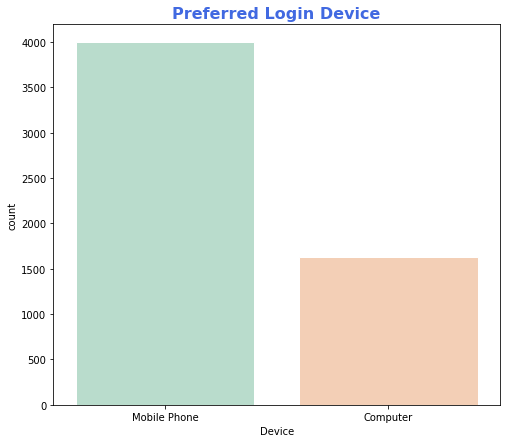

In [ ]:
# Chart Perangkat Pilihan Utama Pelanggan
plt.figure(figsize = (8,7))
plt.title('Preferred Login Device', fontsize = 16, fontweight = 'bold', color = 'royalblue')
sns.set_style('darkgrid')
sns.countplot(x  = 'PreferredLoginDevice',  data = df, palette = 'Pastel2')
plt.xlabel('Device')
plt.show()

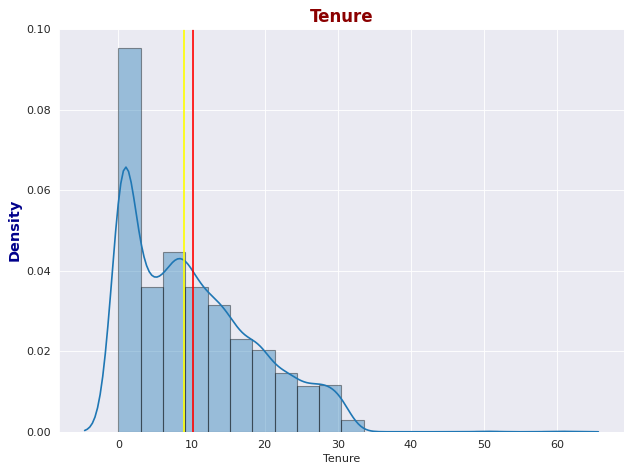

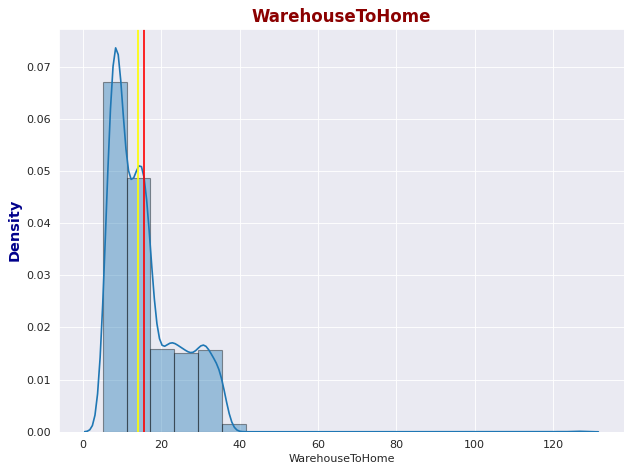

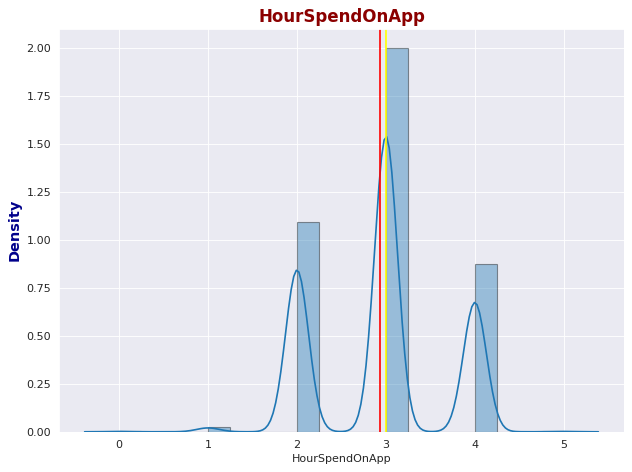

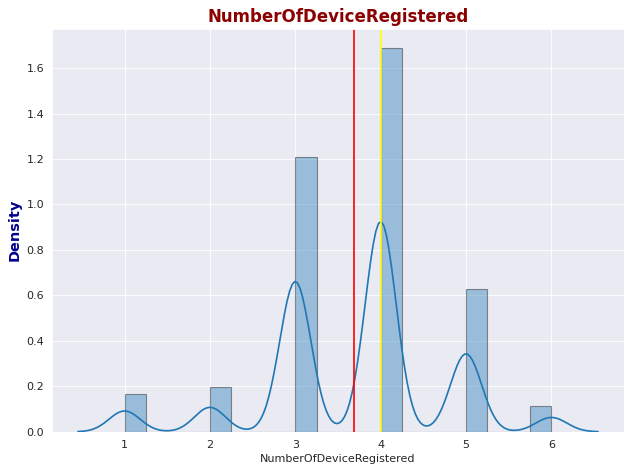

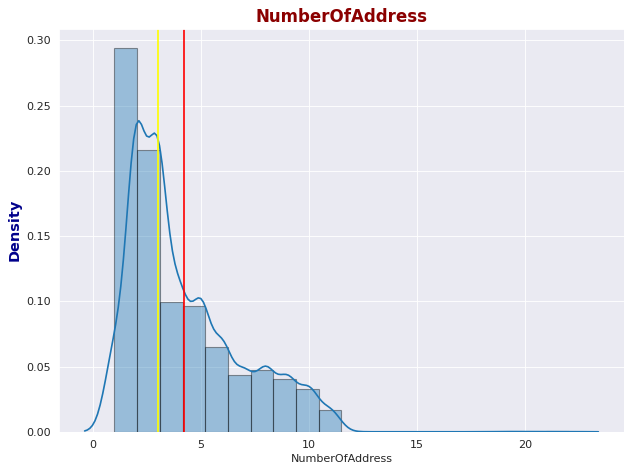

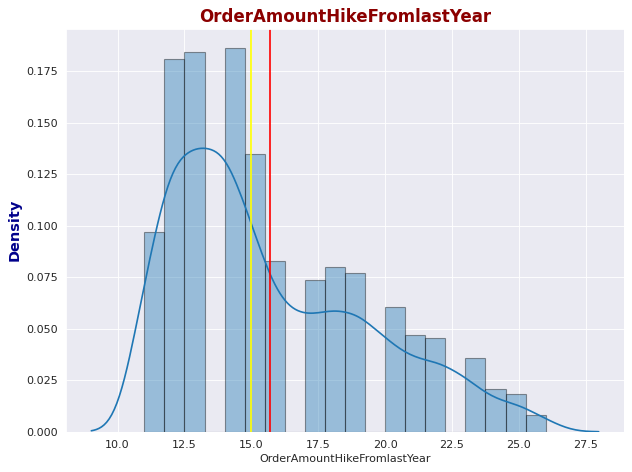

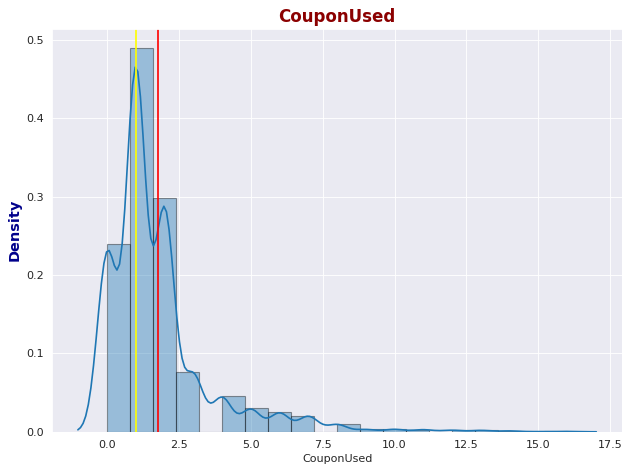

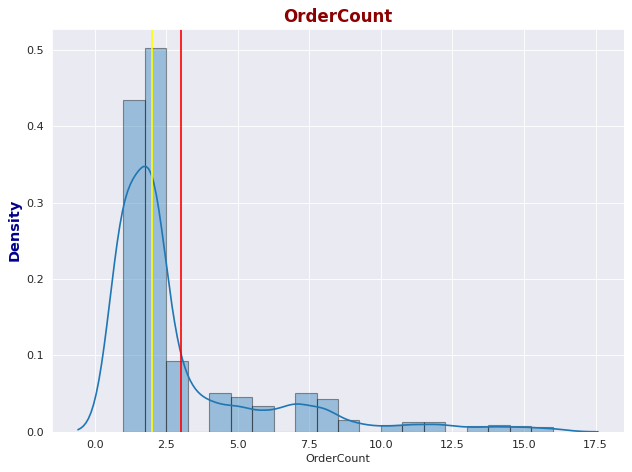

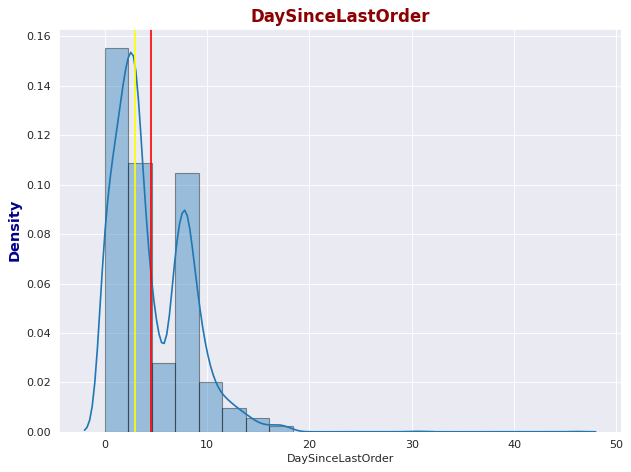

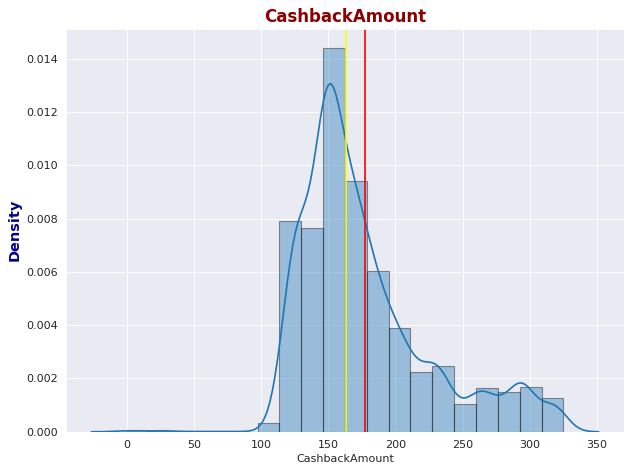

In [ ]:
# Variabel Numerik (Analysis dengan Distplot)
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i in list(kontinu_interval):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.axvline(df[i].describe()['mean'], color = 'red', label = 'mean')
    plt.axvline(df[i].describe()['50%'], color = 'yellow', label = 'median')
    
    plt.title(i, fontdict = title_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

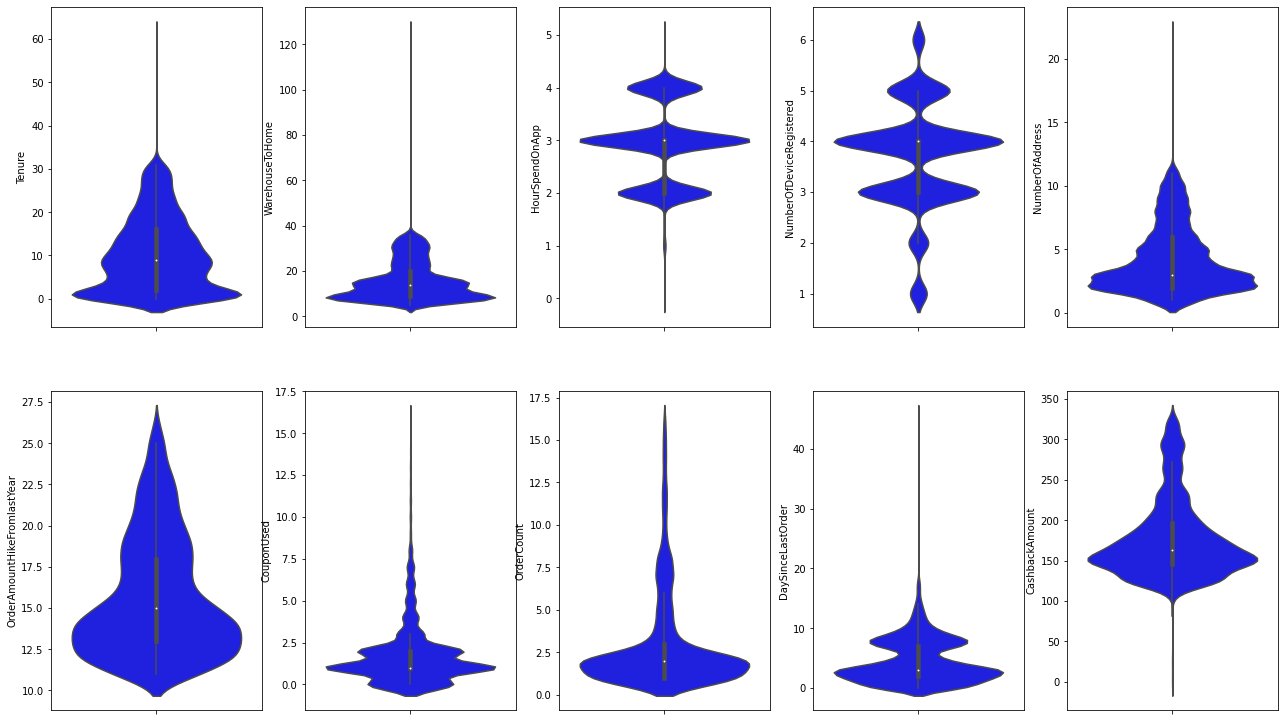

In [ ]:
plt.figure(figsize=(22, 20))
for i in range(0, len(kontinu_interval)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y=df[kontinu_interval[i]], color='blue', orient='v')

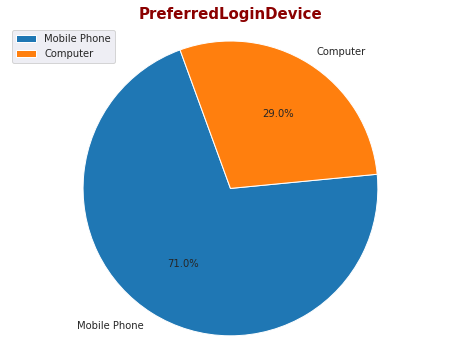

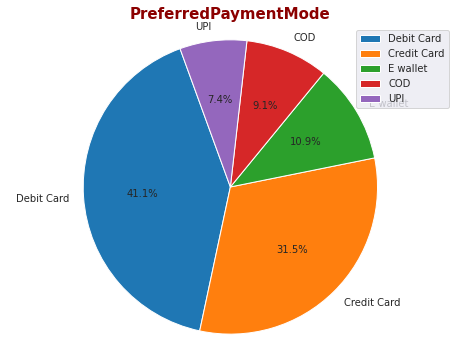

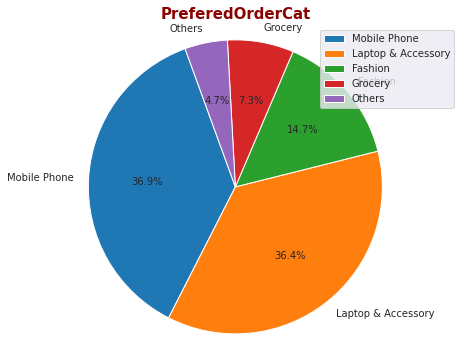

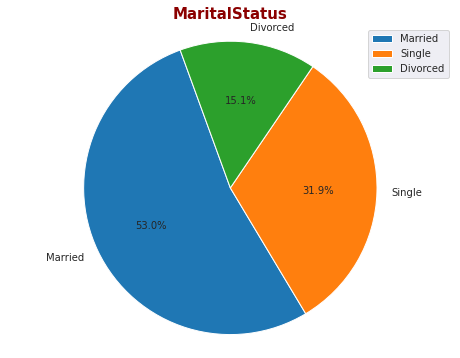

In [ ]:
### Analisi pada variabel kategori
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i in list(cat):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i), fontdict = title_font)
    plt.legend()
    plt.show()

In [ ]:
df_num = df[num]
df_num.describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CityTier,SatisfactionScore,Complain
count,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,10.189899,15.639896,2.931535,3.688988,4.214032,15.707922,1.751023,3.008004,4.543491,177.223030,1.654707,3.066785,0.284902
std,8.557241,8.531475,0.721926,1.023999,2.583586,3.675485,1.894621,2.939680,3.654433,49.207036,0.915389,1.380194,0.451408
min,0.000000,5.000000,0.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,9.000000,2.000000,3.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000,1.000000,2.000000,0.000000
50%,9.000000,14.000000,3.000000,4.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000,1.000000,3.000000,0.000000
75%,16.000000,20.000000,3.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500,3.000000,4.000000,1.000000
max,61.000000,127.000000,5.000000,6.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000,3.000000,5.000000,1.000000


In [ ]:
# Menghitung skewness
print(df_num.skew())

Tenure                         0.736513
WarehouseToHome                1.619154
HourSpendOnApp                -0.027213
NumberOfDeviceRegistered      -0.396969
NumberOfAddress                1.088639
OrderAmountHikeFromlastYear    0.790785
CouponUsed                     2.545653
OrderCount                     2.196414
DaySinceLastOrder              1.191000
CashbackAmount                 1.149846
CityTier                       0.735326
SatisfactionScore             -0.142626
Complain                       0.953347
dtype: float64


In [ ]:
# Outliers
# Outliers merupakan data observasi yang muncul dengan nilai-nilai ekstrim. 
# Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya. 
# Pada umumnya, outliers dapat ditentukan dengan metric IQR(interquartile range). 
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Data suatu observasi dapat dikatakan outliers jika memenuhi kedua syarat: < Q1 - 1.5 * IQR dan > Q3 + 1.5 * IQR
((df_num < (Q1 - 1.5*IQR))|(df_num > (Q3 + 1.5*IQR))).any()

Tenure                          True
WarehouseToHome                 True
HourSpendOnApp                  True
NumberOfDeviceRegistered        True
NumberOfAddress                 True
OrderAmountHikeFromlastYear     True
CouponUsed                      True
OrderCount                      True
DaySinceLastOrder               True
CashbackAmount                  True
CityTier                       False
SatisfactionScore              False
Complain                       False
dtype: bool

In [ ]:
# Chart Metode Pembayaran Utama Pelanggan
df_chart =df['PreferredPaymentMode'].value_counts().reset_index()
df_chart.columns = ['mode', 'count']

import plotly.express as px
fig = px.treemap(df_chart, path = ['mode'],
                 values = 'count', 
                 color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

In [ ]:
# Chart Metode Pembayaran Utama Pelanggan
df_chart =df['PreferredPaymentMode'].value_counts().reset_index()
df_chart.columns = ['mode', 'count']

import plotly.express as px
fig = px.treemap(df_chart, path = ['mode'],
                 values = 'count', 
                 color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()


In [ ]:
df_chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mode    5 non-null      object
 1   count   5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


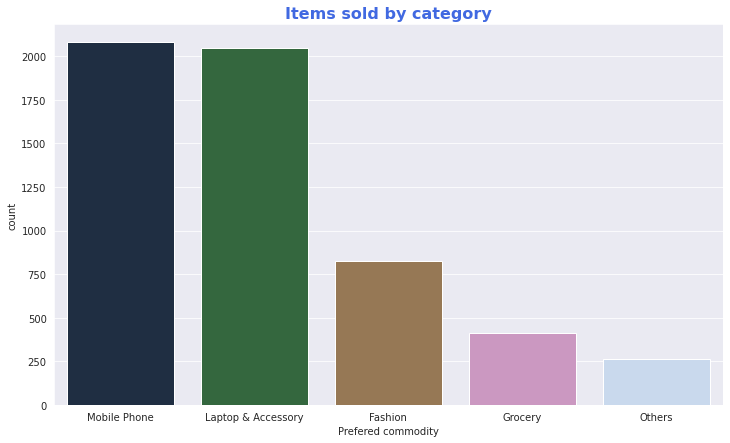

In [ ]:
# Chart Kategori barang yang sering dibeli pelanggan
plt.figure(figsize = (12,7))
sns.countplot(x ='PreferedOrderCat', data = df,
              palette = 'cubehelix',
              order = df['PreferedOrderCat'].value_counts().index) 
plt.title('Items sold by category', fontsize = 16, fontweight = 'bold', color = 'royalblue')
plt.xlabel('Prefered commodity');

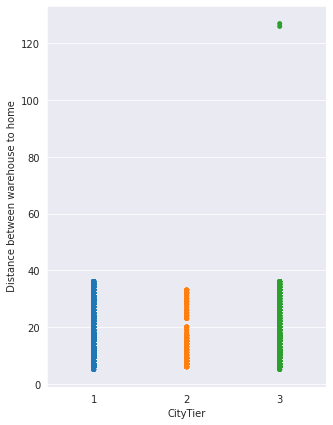

In [ ]:
# Chart jarak antara warehouse dengan rumah pelanggan
df_warehouse = df.copy()

df_warehouse['CityTier'].astype('str')
plt.figure(figsize = (5,7))
sns.stripplot(x = 'CityTier', y = 'WarehouseToHome', data = df_warehouse, jitter = False)
plt.ylabel(' Distance between warehouse to home');

In [ ]:
ct1 = df_warehouse[df_warehouse['CityTier'] == 1]
ct2 = df_warehouse[df_warehouse['CityTier'] == 2]
ct3 = df_warehouse[df_warehouse['CityTier'] == 3]

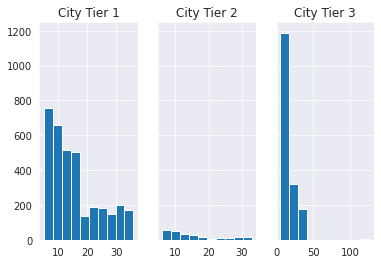

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(ct1['WarehouseToHome'])
axs[0].set_title('City Tier 1')

axs[1].hist(ct2['WarehouseToHome'])
axs[1].set_title('City Tier 2')

axs[2].hist(ct3['WarehouseToHome'])
axs[2].set_title('City Tier 3')

plt.show()

In [ ]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00
CashbackAmount,5630.0,177.223030,49.207036,0.0,145.77,163.28,196.3925,324.99


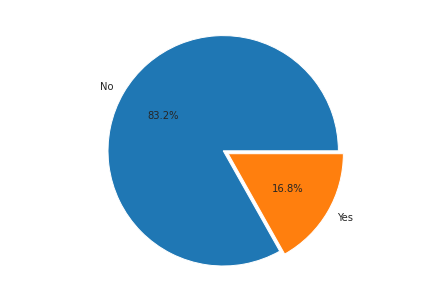

In [ ]:
# Menvisualisasikan Prosentase Churn
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
explode = [0, 0.05]
churn = df.Churn.value_counts()
ax.pie(churn, labels=labels, explode = explode, autopct='%1.1f%%')
plt.show()

### Bivariate Analysis — analisis yang dilakukan untuk mengetahui hubungan antara 2 variabel. 

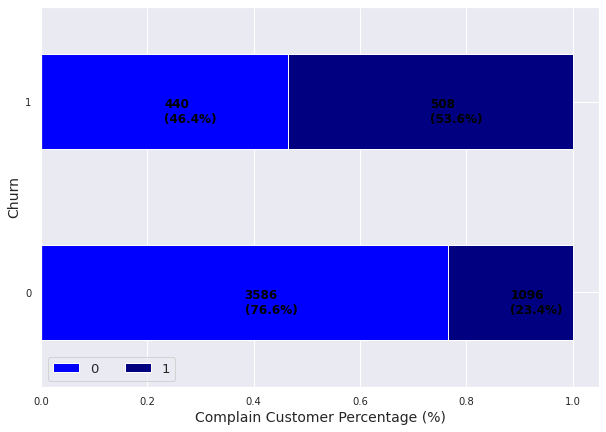

In [ ]:
# Churn dan Complain
cross_tab_prop = pd.crosstab(index=df['Churn'],
                             columns=df['Complain'],
                             normalize="index")
cross_tab = pd.crosstab(index=df['Churn'],
                             columns=df['Complain'])
cross_tab
cross_tab_prop.plot(kind='barh', 
                        stacked=True, 
                        color=['blue','navy'], 
                        figsize=(10, 7))

plt.legend(loc="lower left", ncol=2)
plt.ylabel("Churn",fontsize=14)
plt.xlabel("Complain Customer Percentage (%)",fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

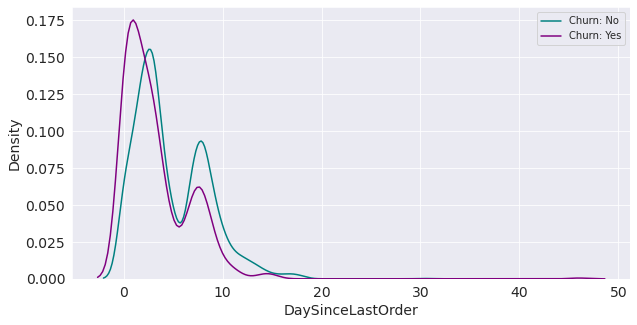

In [ ]:
# Churn dan Day Since Last Order
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['DaySinceLastOrder'].dropna(), color= '#008080', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['DaySinceLastOrder'].dropna(), color= '#800080', label= 'Churn: Yes', ax=ax)

ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('DaySinceLastOrder', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper right')


plt.savefig('Last Order churn',transparent=True)

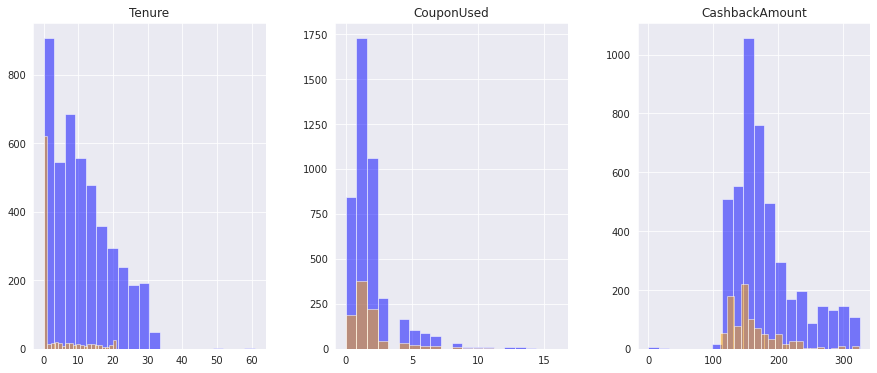

In [ ]:
# Memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya

# Membuat bin di chart
numerical_features = ['Tenure', 'CouponUsed', 'CashbackAmount']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Gunakan kode berikut untuk memplot dua overlay histogram per masing-masing numerik_fitur, gunakan warna biru dan oranye, masing-masing
df[df.Churn == 0][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 1][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

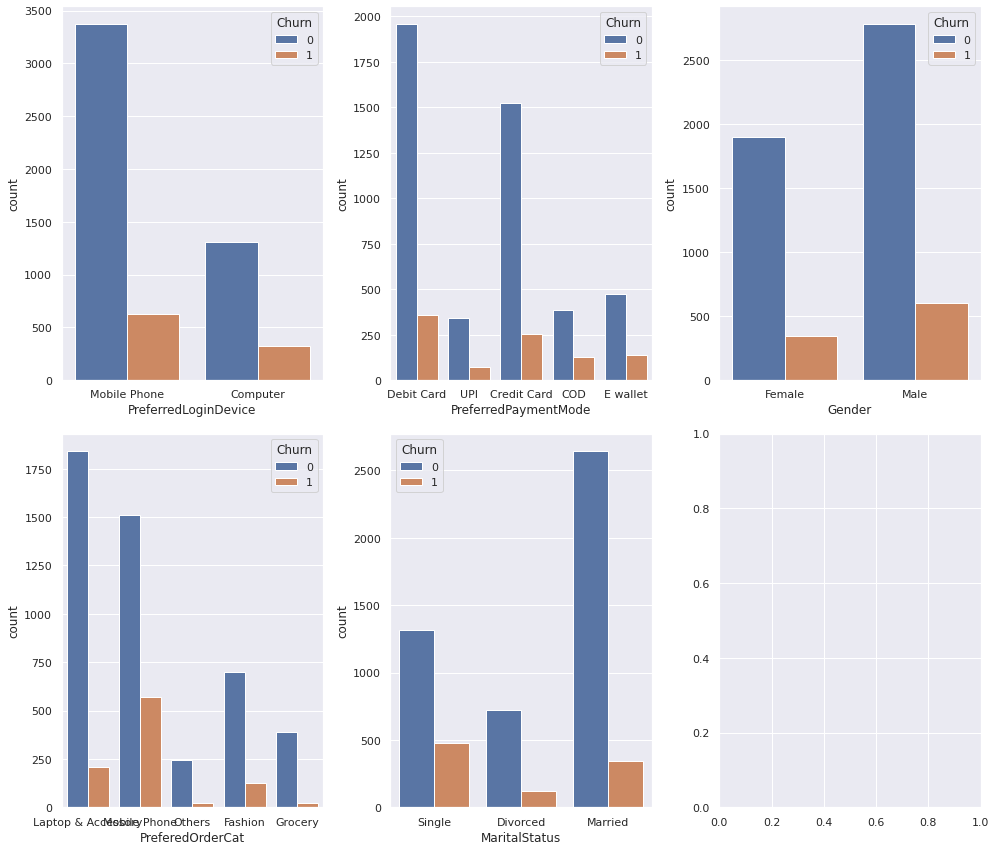

In [ ]:
# Melakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat
sns.set(style='darkgrid')

fig, ax = plt.subplots(2, 3, figsize=(14, 12))
sns.countplot(data=df, x='PreferredLoginDevice', hue='Churn', ax=ax[0][0])
sns.countplot(data=df, x='PreferredPaymentMode', hue='Churn', ax=ax[0][1])
sns.countplot(data=df, x='Gender', hue='Churn', ax=ax[0][2])
sns.countplot(data=df, x='PreferedOrderCat', hue='Churn', ax=ax[1][0])
sns.countplot(data=df, x='MaritalStatus', hue='Churn', ax=ax[1][1])
plt.tight_layout()
plt.show()

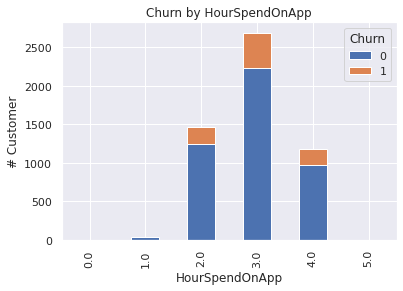

In [ ]:
# Chart Churn dan HourSpendOnApp
HourxChurn = pd.crosstab(df["HourSpendOnApp"], df["Churn"])
HourxChurn.plot(kind = 'bar', stacked = 'true', title = "Churn by HourSpendOnApp")
plt.xlabel('HourSpendOnApp')
plt.ylabel('# Customer')
plt.show()

Rata-rata customer menggunakan applikasi selama 2 sampai 4 jam. Kurang lebih sekitar 50% costumer menggunakan applikasi selama 3 jam dan 8,6% diantaranya churn.

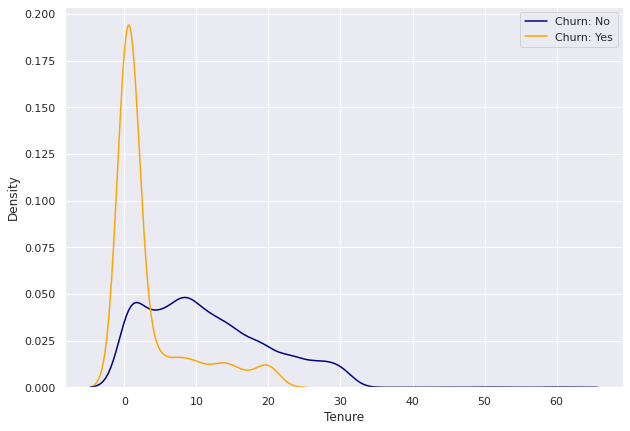

In [ ]:
# Chart Churn dan Tenure
fig, ax = plt.subplots(figsize=(10,7))

sns.kdeplot(df[df['Churn']==0]['Tenure'].dropna(),color='navy',label='Churn: No', ax=ax)
sns.kdeplot(df[df['Churn']==1]['Tenure'].dropna(),color='orange',label='Churn: Yes', ax=ax)
plt.legend() ; 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca6fb5dc90>,
      dtype=object)

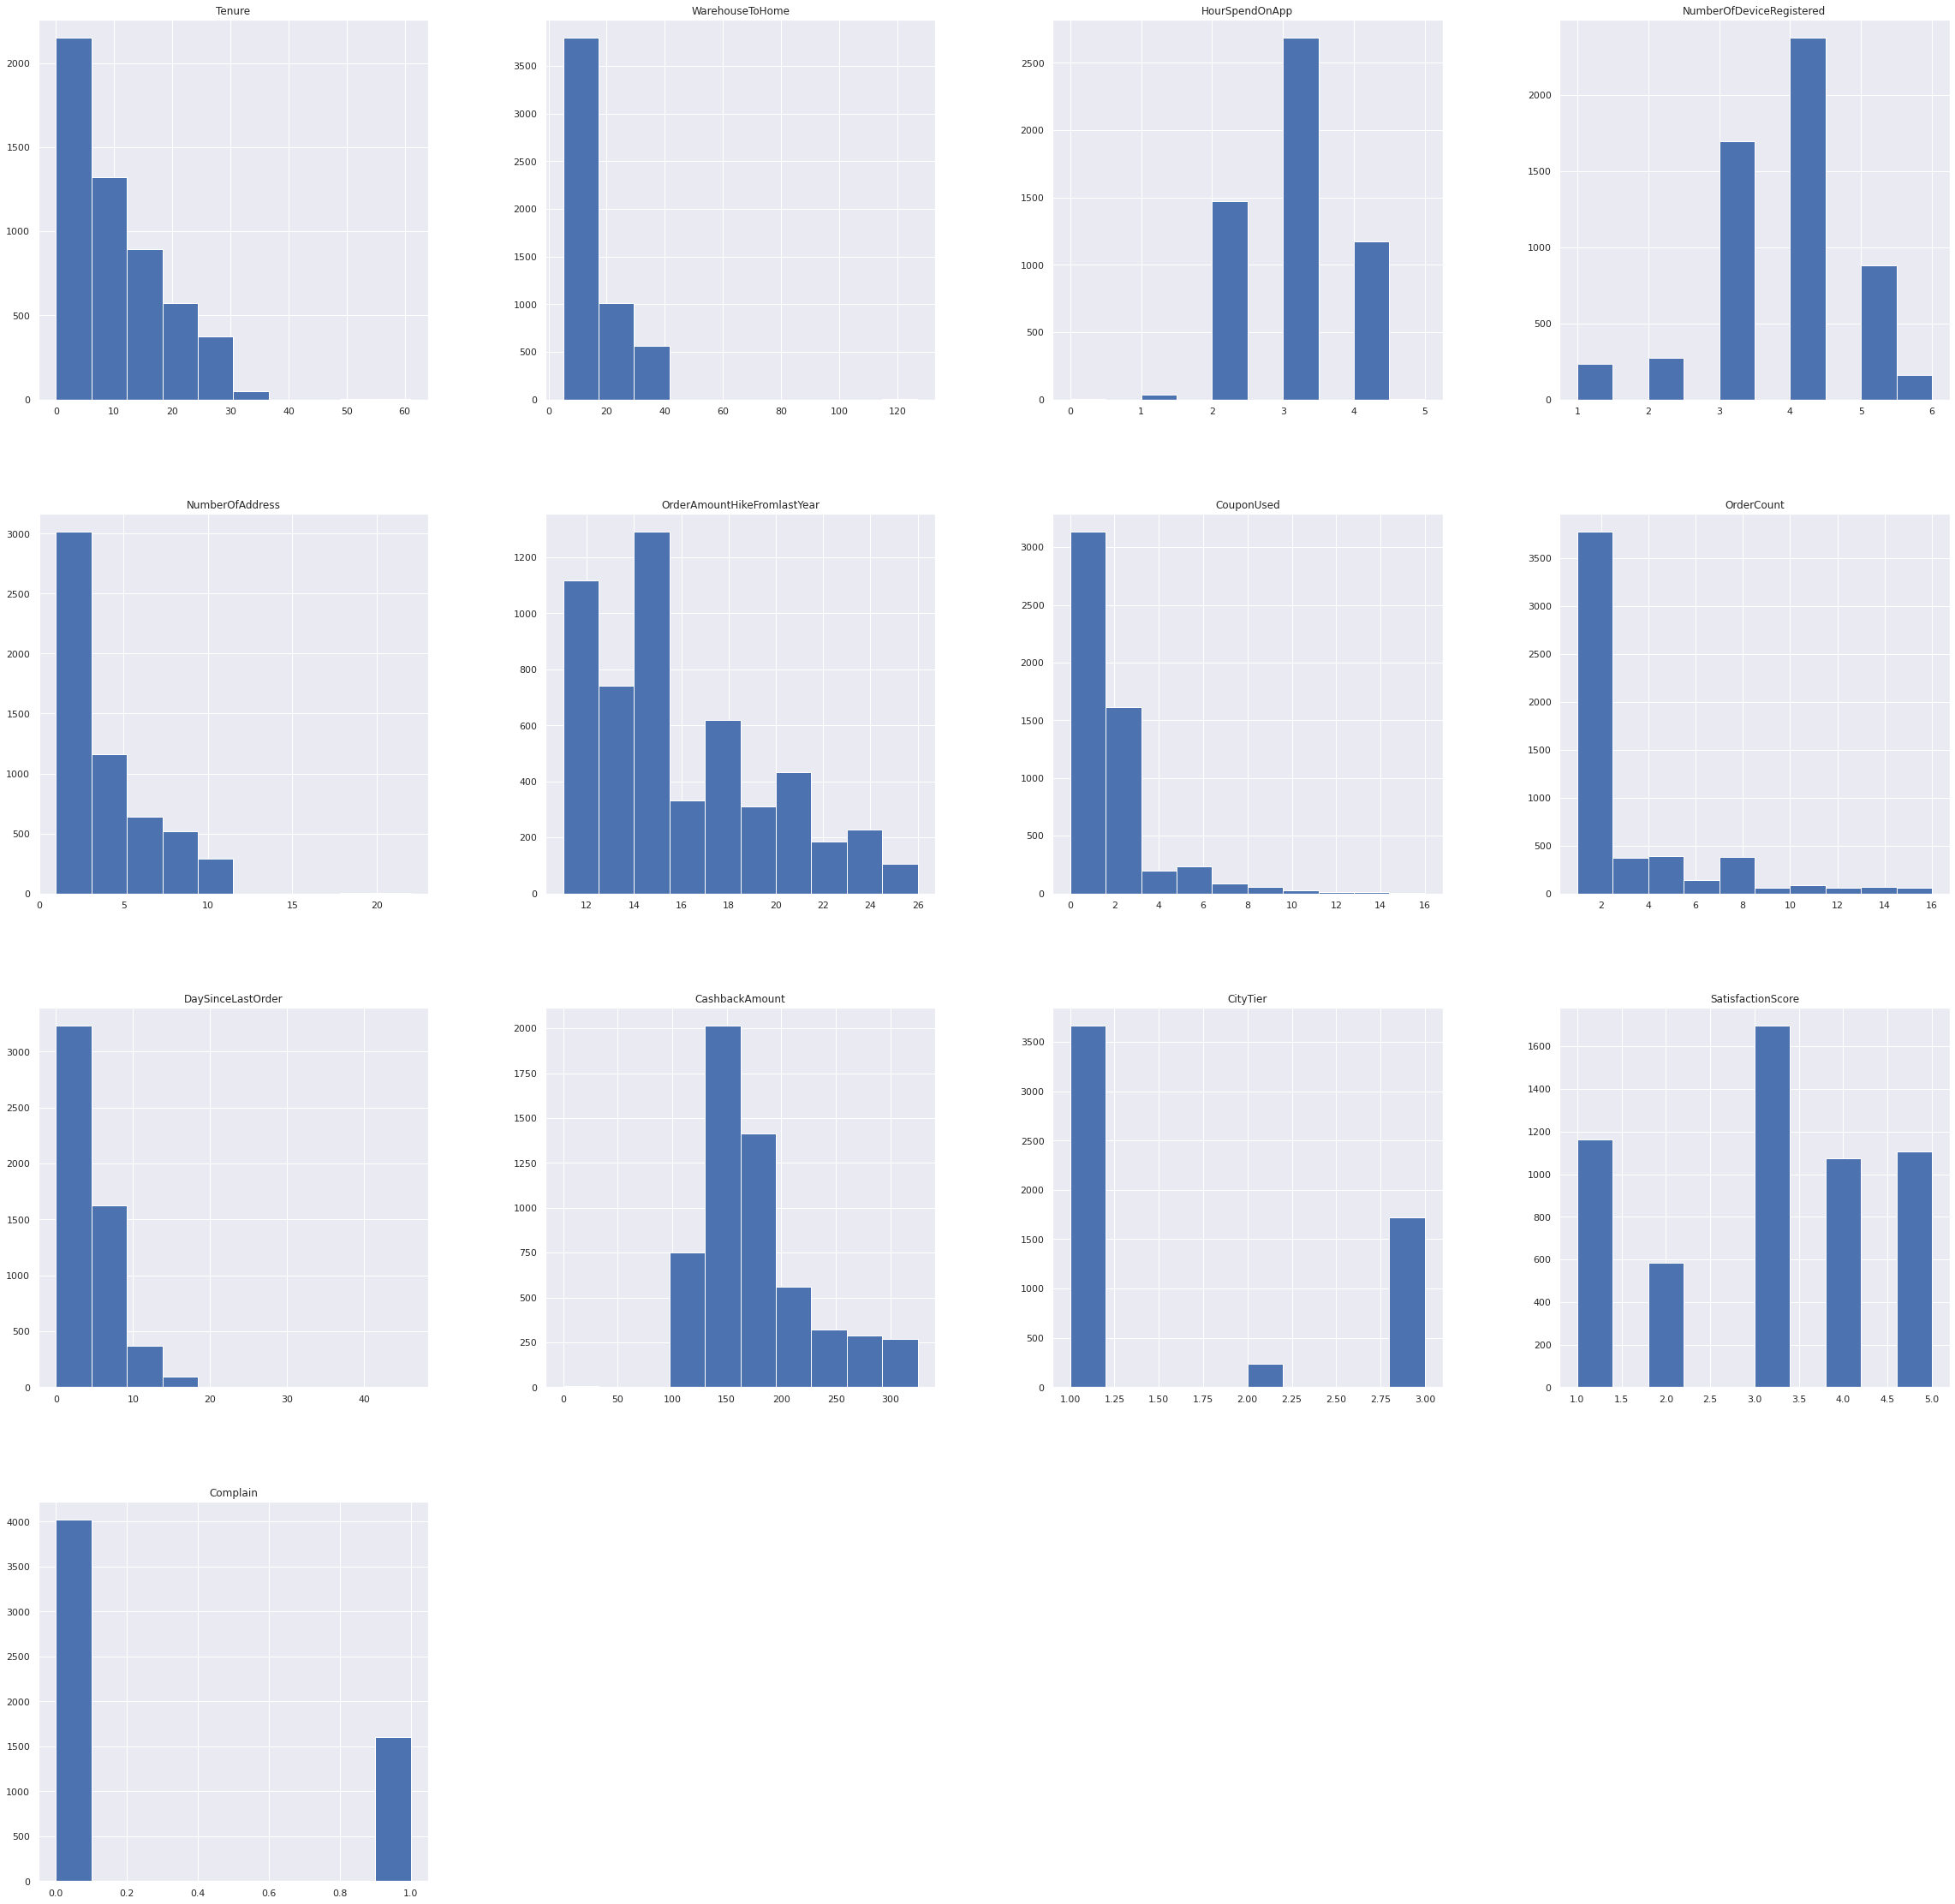

In [ ]:
df[num].hist(figsize=(40,40))

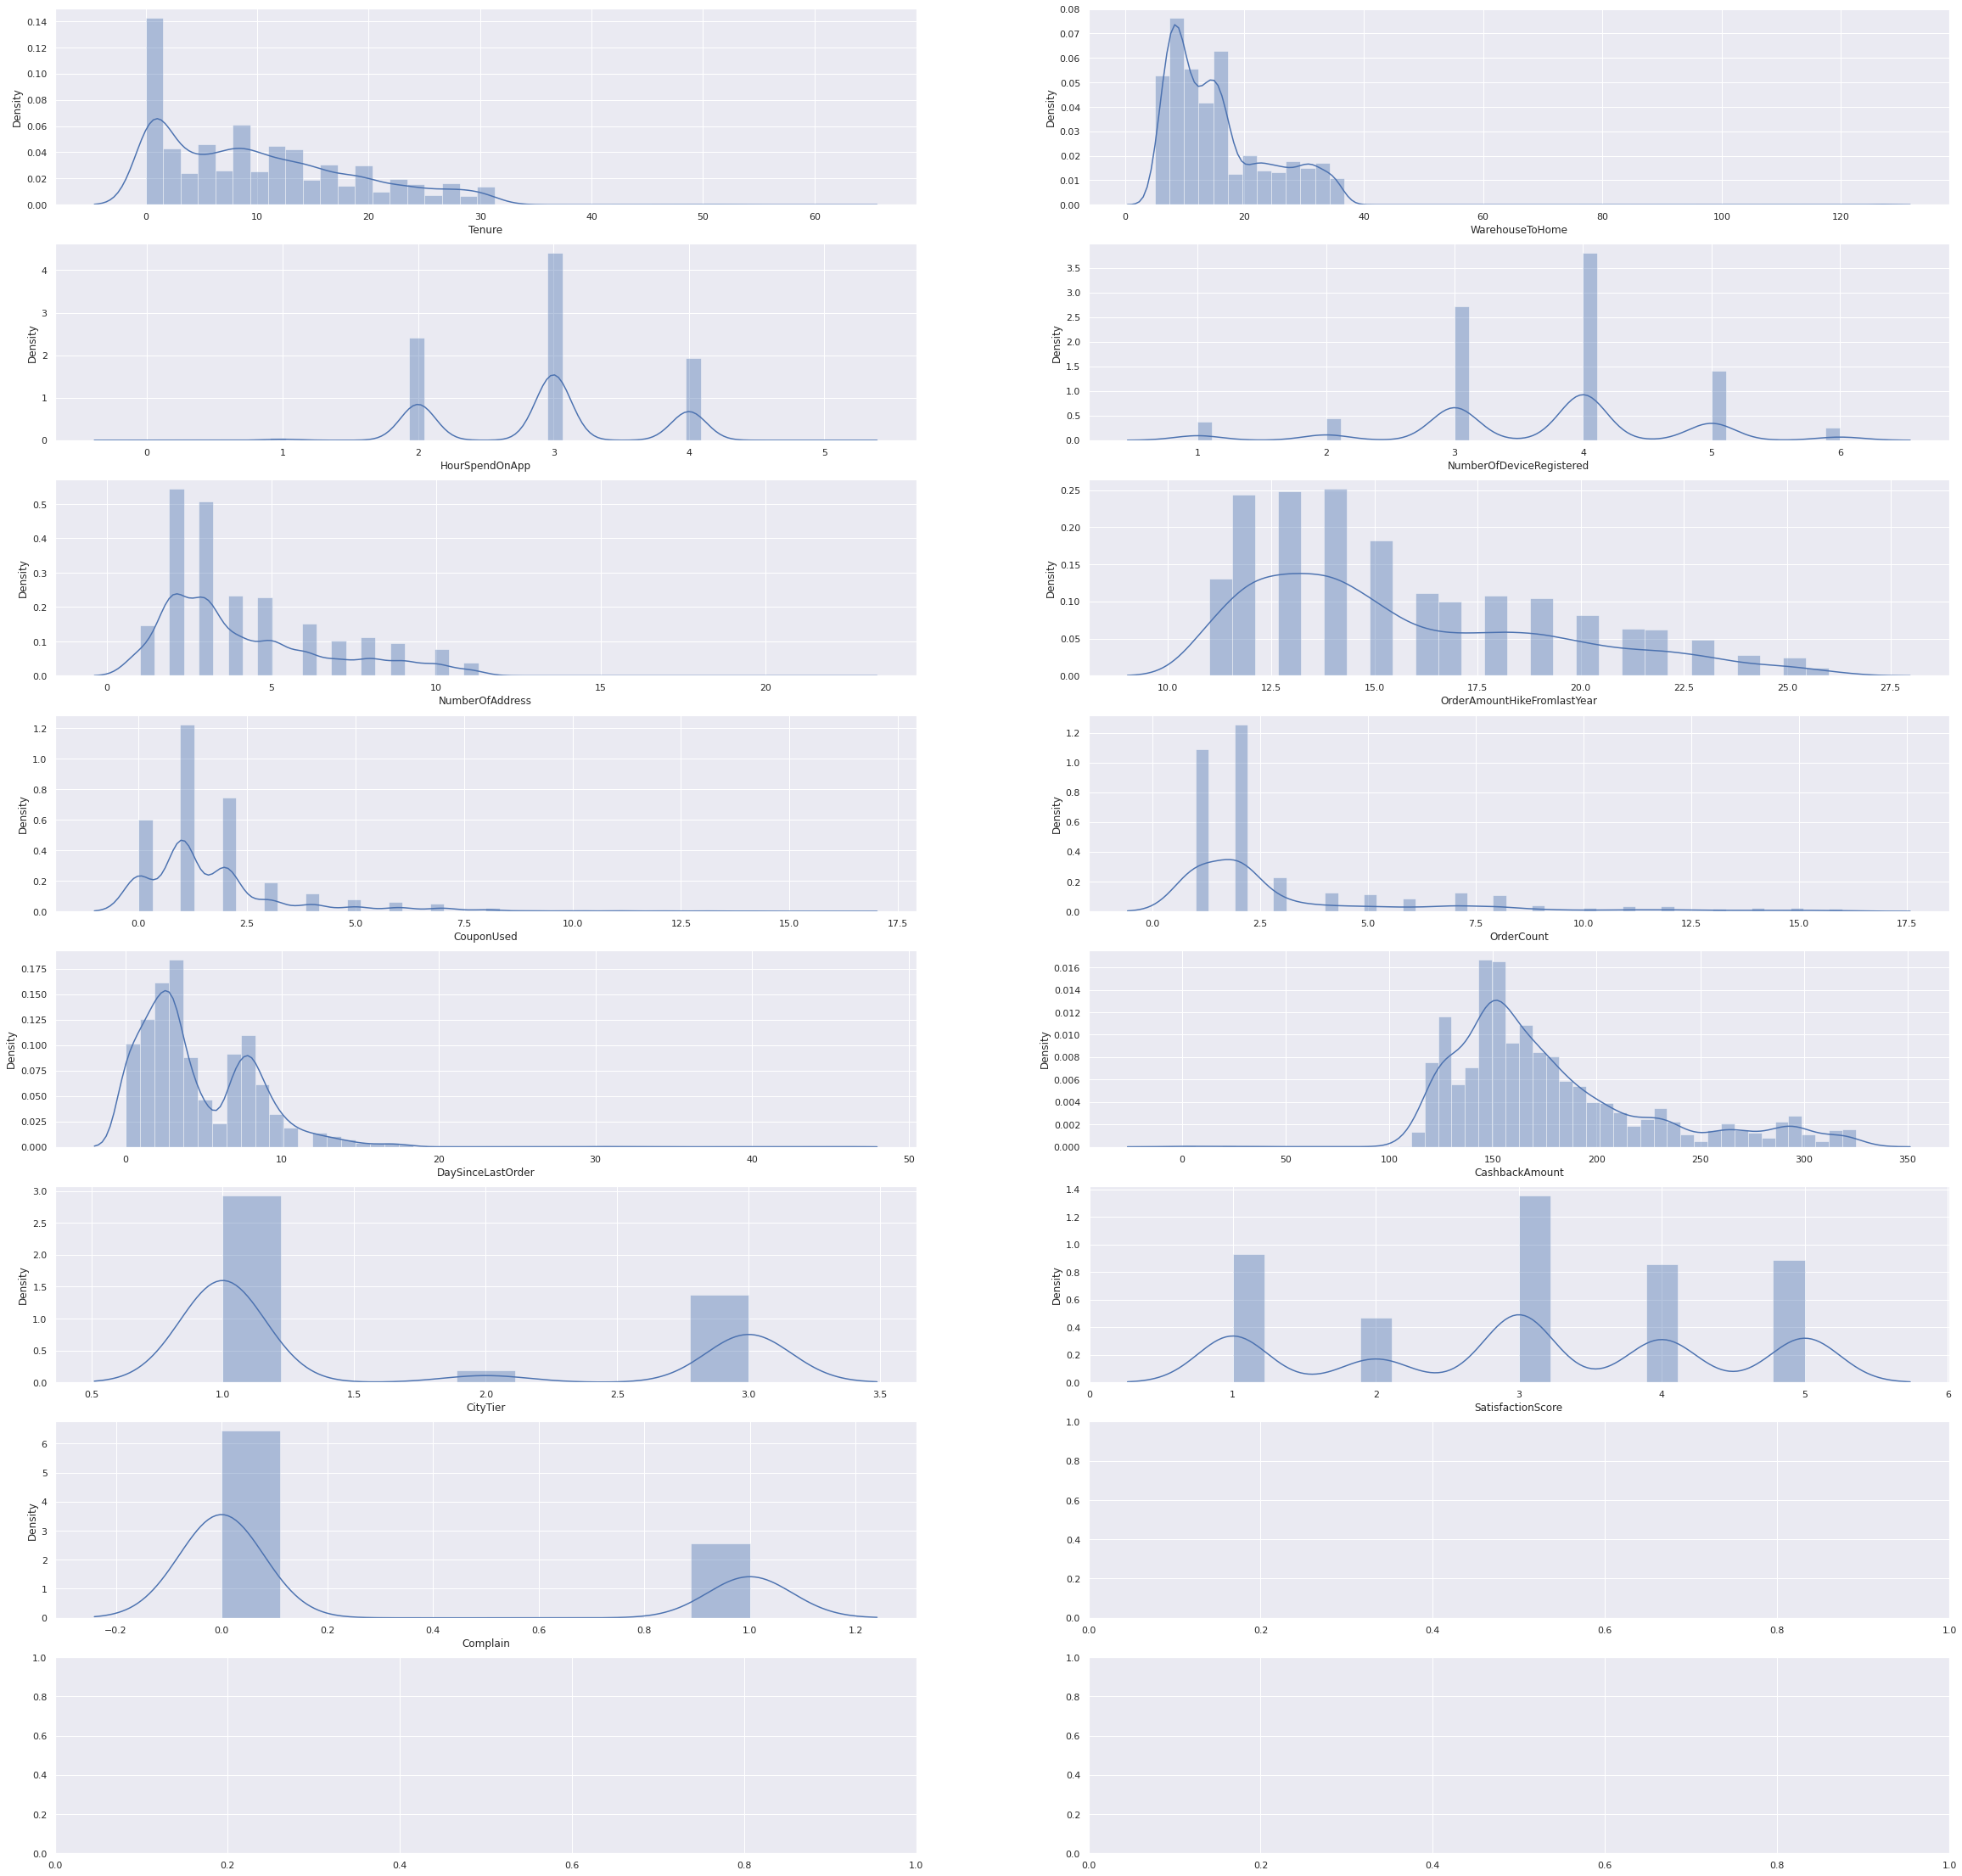

In [ ]:
fig, ax = plt.subplots(8, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df[i], ax=subplot)

### Multivariate Analysis — analisis relasi lebih dari dua variabel

In [ ]:
# Mendefinisikan tuple untuk menyimpan dataframe yang berisi informasi tentang kontribusi setiap nilai ke churn pelanggan.
d={}

for i in df.columns:
    d[i] = pd.concat([df.groupby(i).Churn.sum(),df[i].value_counts(),round(df.groupby(i).Churn.sum()*100/df[i].value_counts(),2)], axis=1)
    d[i].reset_index(level=0,inplace=True)
    d[i] = d[i].rename(columns = {'index':i, 'Churn':'Customers_churned', i:'Total_Customers', 0:'perc_of_total_cust'}, )

In [ ]:
for i in df.columns:
    print(i)
    print(d[i])
    print()

Churn
   Churn  Total_Customers  Total_Customers  Total_Customers
0      0                0             4682              0.0
1      1              948              948            100.0

Tenure
    Tenure  Customers_churned  Total_Customers  perc_of_total_cust
0      0.0                272              508               53.54
1      1.0                349              690               50.58
2      2.0                 14              167                8.38
3      3.0                 18              195                9.23
4      4.0                 20              203                9.85
5      5.0                 16              204                7.84
6      6.0                  8              183                4.37
7      7.0                 16              221                7.24
8      8.0                 16              263                6.08
9      9.0                 12              247                4.86
10    10.0                 14              213                6.57
11

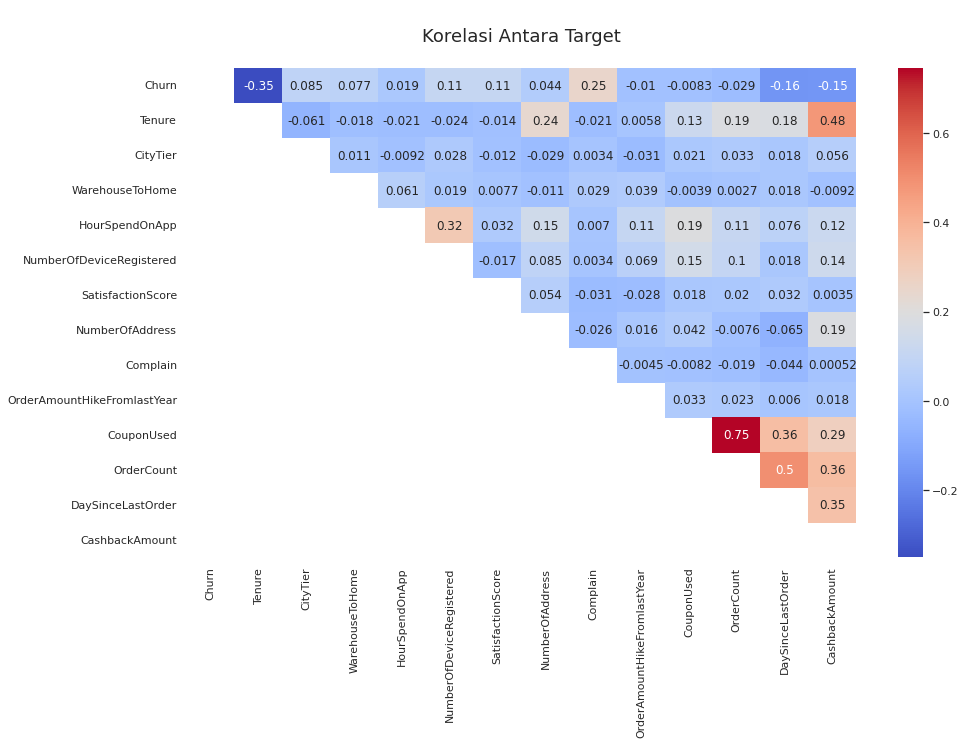

In [ ]:
def half_corr_heatmap(data, title=None):
    plt.figure(figsize=(15,9))
    sns.set(font_scale=1)
    
    mask = np.zeros_like(data.corr())
    mask[np.tril_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(data.corr(), mask=mask, annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    plt.show()
    return

half_corr_heatmap(df, 'Korelasi Antara Target')

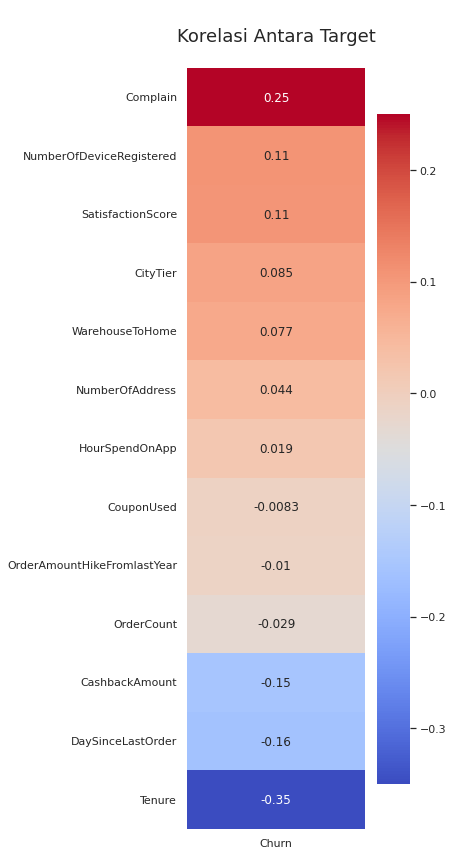

In [ ]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,14))
    sns.set(font_scale=1)
    
    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

corr_for_target(df, 'Churn', 'Korelasi Antara Target')

Analisis korelasi menjelaskan ada atau tidaknya hubungan antar dua variabel. Nilai Korelasi bisa positif atau negatif atau lemah. Korelasi positif yang artinya jika penambahan pada nilai X maka bertambah juga nilai Y. Korelasi negatif menjelaskan hubungan setiap kenaikan nilai X maka ada penurunan pada nilai Y. Korelasi yang lemah menjelaskan dua variabel ini tidak ada hubungannya sama sekali. Hasil korelasi dapat dinilai dari standar:
- Nilai 0 - 0,3 berarti lemah
- Nilai 0,3 - 0,7 berarti hubungannya sedang
- Nilai 0,7 - 1 berarti kekuatan hubungannya kuat

### Kesimpulan hasil EDA:
*  Variabel numerik yang distribusinya cenderung skew positif (atau menceng ke kanan) karena mean < median < mode dan mempunyai nilai Outlier
   *  Tenure
   *  WarehouseToHome
   *  NumberOfAddress
   *  OrderAmountHikeFromlastYear
   *  CouponUsed
   *  OrderCount
   *  DaySinceLastOrder
   *  CashbackAmount
*  Sebaran data secara kesuluruhan mayoritas pelanggan tidak melakukan churn, dengan detil Churn sebanyak 16,84% dan No Churn sebanyak 83,16%.
*  Untuk tenure, pelanggan berlangganan  paling sebentar mempunyai kecenderungan untuk melakukan churn.
*  Ada kecenderungan semakin tinggi kupon yang digunakan, semakin tinggi juga kecenderungan untuk melakukan churn. 
*  Dilihat dari perangkat yang digunakan untuk login, mobile phone merupakan pilihan favorit pelanggan yang melakukan churn.
*  Dilihat dari metode pembayaran, yang sering digunakan oleh pelanggan yang churn adalah debit card.
*  Pelanggan melakukan churn dilihat dari faktor jenis kelamin (gender), pria lebih sering melakukan churn.
*  Pelanggan dengan status single merupakan pelanggan yang sering melakukan churn.
*  Churn rate tinggi pada pelanggan yang komplain.
* Rata-rata customer menggunakan applikasi selama 2 sampai 4 jam. Kebanyakan customer menggunakan applikasi selama 3 jam yaitu sekitar 50% costumer dan 8,6% diantaranya churn.
*  Kolom Churn adalah variabel target
*  Churn memiliki kolerasi positif lemah dengan CityTier, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, Complain
*  Terdapat multicollinearity pada kolom CouponUsed dan OrderCount terlihat dari chart heatmap memiliki nilai 0.75. Multicollinearity adalah konsep statistik di mana beberapa variabel independen dalam suatu model dikorelasikan. Dua variabel dikatakan kolinear sempurna jika koefisien korelasinya +/- 1,0. Multikolinearitas antar variabel independen akan menghasilkan inferensi statistik yang kurang reliabel.

## Business Insight
Mendapatkan pelanggan baru umumnya akan lebih mahal jika dibandingkan dengan mempertahankan pelanggan yang sudah ada. Selain itu, mempertahankan pelanggan juga mampu memberikan dampak yang sangat besar pada *growth rate* daripada mendapatkan pelanggan baru.
Hal pertama yang harus diketahui untuk  meminimalisir persentase churn rate adalah dengan mengetahui penyebab utama dari presentase churn tersebut agar bisa di atasi oleh perusahaan. 
-  Hal tersebut bisa datang dari UI atau UX Anda yang kurang ramah untuk pengguna, keterbatasan fitur pada aplikasi, dll. Dalam hal ini UI atau UX perlu dilakukan pengembangan lebih lanjut karena hasil EDA menunjukan pelanggan paling banyak menggunakan mobile phone untuk mengakses layanan.
-  Member dengan waktu paling singkat menunjukan churn yang tinggi mungkin juga disebabkan faktor UI/UX seperti yang disebutkan diatas. Disarankan juga memperbanyak penawaran menarik agar masa berlangganan pelanggan bisa bertahan lama
- Perusahaan juga perlu memperbanyak jumlah cashback (ie. cashback points) untuk pelanggan setia atau pelanggan yang melakukan pembelanjaan dengan nominal tertentu
-  Memperbanyak pilihan produk pada kategori mobile phone dengan harga yang bersaing dan memberikan promo diskon (ie. free assesoris hp, free ongkir)
-  Membuat diskon tambahan bagi pemegang kartu debit (ie. cashback points, free ongkir dengan menggunakan kartu debit bank yang bekerjasama)
-  Membuat acara live event dan menambah produk yang sedang trend yang dapat membuat pelanggan terutama pria untuk tetap setia jadi pelanggan perusahaan kita.
-  Memperbaiki Journey Map pelanggan, agar perusahaan dapat memperbaiki langkah-langkah yang menyebabkan pelanggan menjadi churn, seperti sulitnya untuk mengakses menu diaplikasi, dan perusahaan dapat mendefinisikan Kembali pelanggan ideal untuk perusahaan agar bagian marketing/sales tidak salah dalam mendapatkan pelanggan.

# Data Preparation (Data Pre-Processing)

### Handling the Missing Values
Raw data belum tentu bisa langsung digunakan untuk pemodelan. Jika kita memiliki banyak missing value, maka akan mengurangi performansi model dan juga beberapa algorithm machine learning tidak dapat memproses data dengan missing value. Oleh karena itu, kita perlu mengecek apakah terdapat missing value dalam data atau tidak.

In [9]:
# Menampilkan kolom yang memiliki missing value
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

Tenure
the total null values are: 264
the datatype is float64

WarehouseToHome
the total null values are: 251
the datatype is float64

HourSpendOnApp
the total null values are: 255
the datatype is float64

OrderAmountHikeFromlastYear
the total null values are: 265
the datatype is float64

CouponUsed
the total null values are: 256
the datatype is float64

OrderCount
the total null values are: 258
the datatype is float64

DaySinceLastOrder
the total null values are: 307
the datatype is float64



Missing value ini bisa kita masukan nilainya tergantung tipe datanya, jika tipe data kategori bisa kita input missing value dari modus, atau jika continuous bisa berupa mean / median dari variabel tersebut. Gunakan mean jika tidak ada data yang skewed, tetapi gunakan median jika ada data yang skewed (data yang membuat kurva miring dan asimetris pada grafik), contoh data skewed ada di kolom Tenure, WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, dan CashbackAmount.


In [10]:
# Mengatasi missing value dengan metode impute missing value
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

In [11]:
# Mengecek missing value
df.isnull().sum() 

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Handling Duplicated Data
Tidak perlu dilakukan karena tidak ada data yang duplikat

### Handling the Outliers
Outliers merupakan data observasi yang muncul dengan nilai-nilai ekstrim. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya. Pada umumnya, outliers dapat ditentukan dengan metric IQR(interquartile range). 

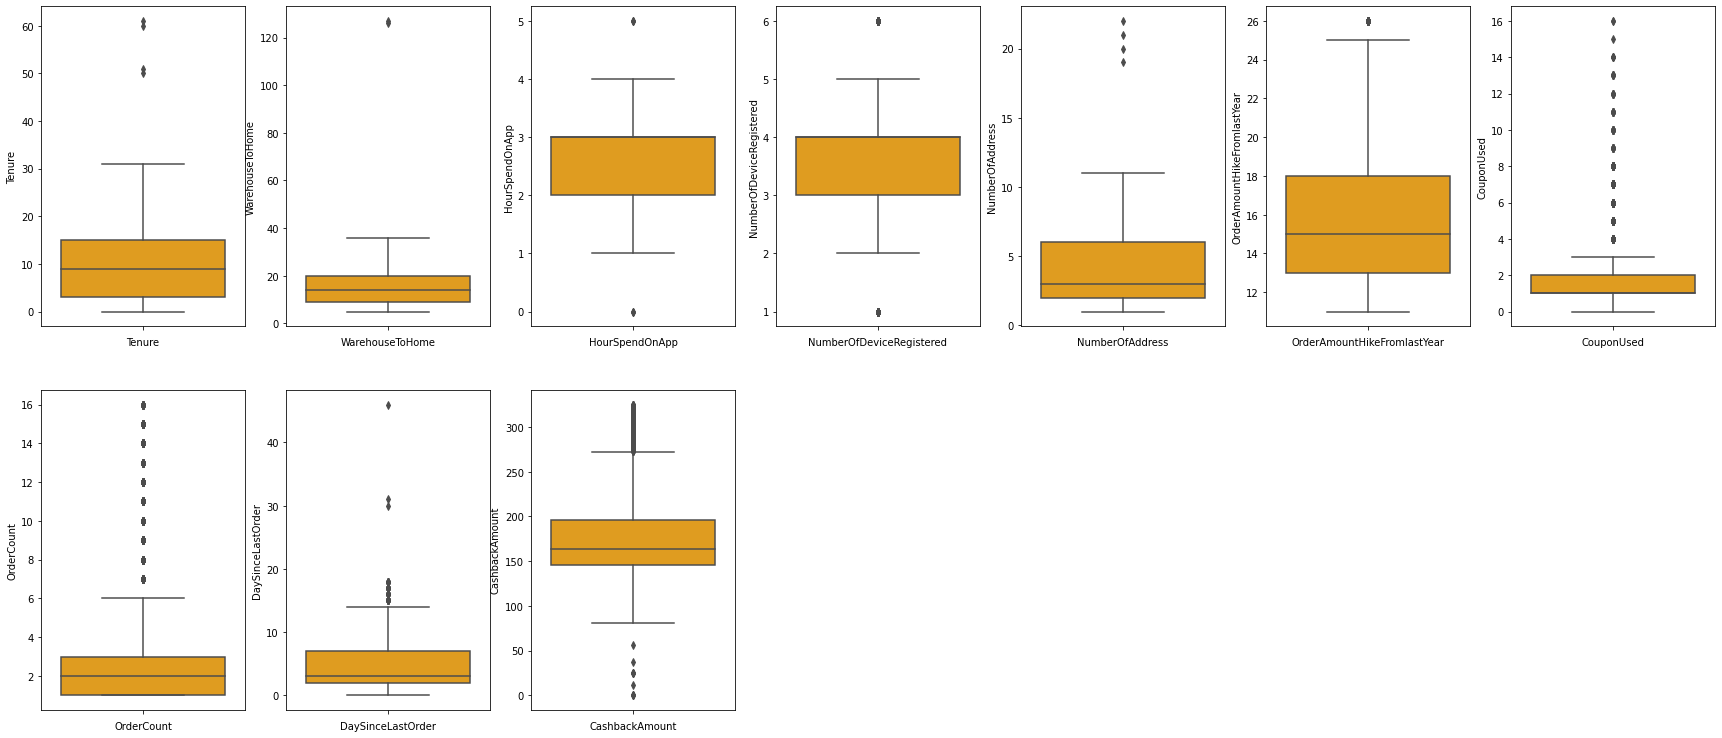

In [12]:
# Mengidentifikasi Outlier dengan dengan menggunakan chart
plt.figure(figsize=(30,20))
features = kontinu_interval
for i in range(0, len(features)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df[features[i]], color='orange', orient='v')
    plt.xlabel(features[i])

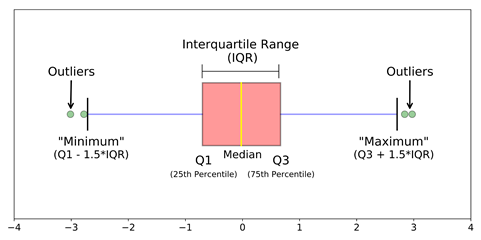

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img2=cv2.imread('/content/drives/My Drive/Colab Notebooks/IQR.png', cv2.IMREAD_UNCHANGED)

cv2_imshow(img2)

In [13]:
# Mengidentifikasi Outlier dengan Interquartile Range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Churn                           0.0000
Tenure                         12.0000
CityTier                        2.0000
WarehouseToHome                11.0000
HourSpendOnApp                  1.0000
NumberOfDeviceRegistered        1.0000
SatisfactionScore               2.0000
NumberOfAddress                 4.0000
Complain                        1.0000
OrderAmountHikeFromlastYear     5.0000
CouponUsed                      1.0000
OrderCount                      2.0000
DaySinceLastOrder               5.0000
CashbackAmount                 50.6225
dtype: float64

#### Menggunakan Z Score 

In [14]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in df[num]:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
df_z = df[filtered_entries] 

print(f'Jumlah baris setelah memfilter outlier: {len(df_z)}')
print('Maka outlier yang dihapus sekitar', round((len(df)-len(df_z))/len(df)*100), '%')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5350
Maka outlier yang dihapus sekitar 5 %


In [15]:
# Mengecek kolom yang outlier dengan IQR
Q1 = df_z[kontinu_interval].quantile(0.25)
Q3 = df_z[kontinu_interval].quantile(0.75)
IQR = Q3 - Q1
IQR
((df_z[kontinu_interval] < (Q1 - 1.5*IQR))|(df_z[kontinu_interval] > (Q3 + 1.5*IQR))).any()

Tenure                         False
WarehouseToHome                False
HourSpendOnApp                  True
NumberOfDeviceRegistered        True
NumberOfAddress                False
OrderAmountHikeFromlastYear     True
CouponUsed                      True
OrderCount                      True
DaySinceLastOrder               True
CashbackAmount                  True
dtype: bool

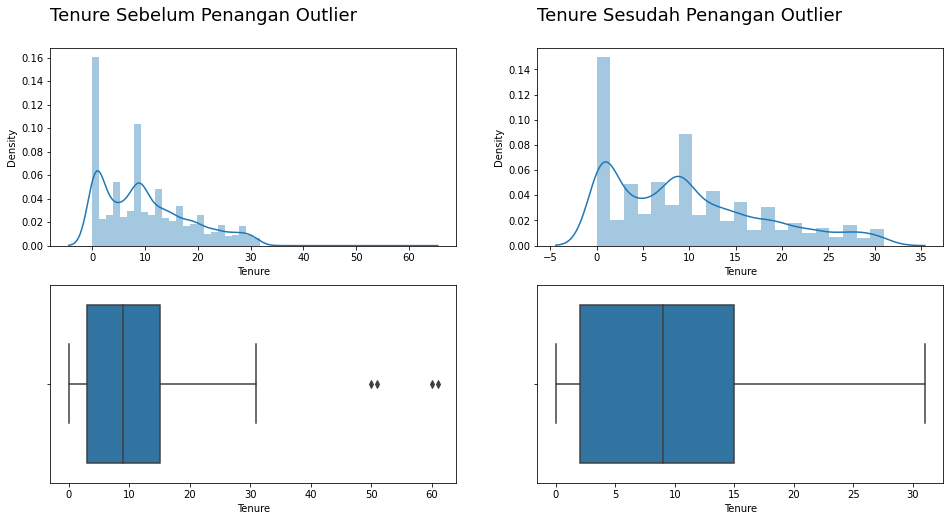

In [ ]:
# Melakukan pengecekan outlier dengan menggunakan chart
# Melakukan perbandingan sebelum dan sesudah pada kolom Tenure
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Tenure'])
plt.title('Tenure Sebelum Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,2)
sns.distplot(df_z['Tenure'])
plt.title('Tenure Sesudah Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,3)
sns.boxplot(df['Tenure'])
plt.subplot(2,2,4)
sns.boxplot(df_z['Tenure'])
plt.show()

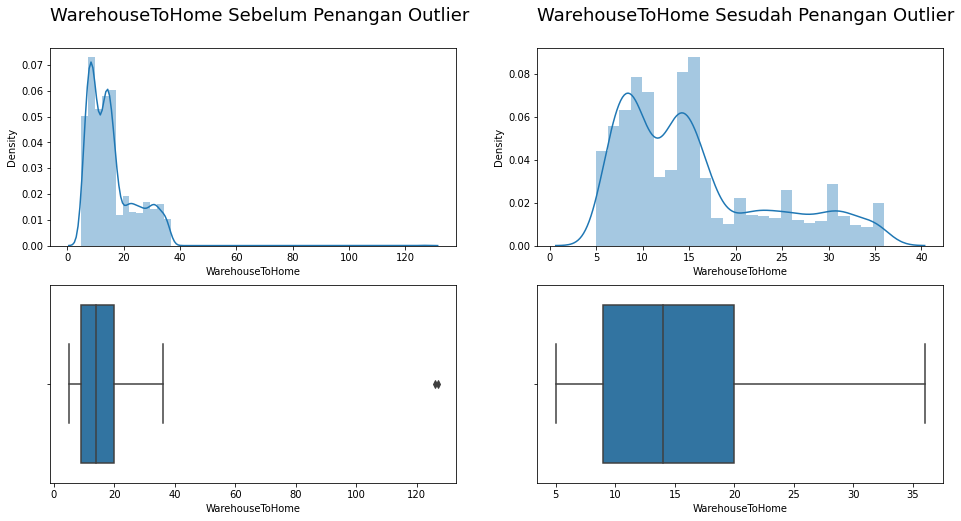

In [ ]:
# Melakukan perbandingan sebelum dan sesudah pada kolom WarehouseToHome
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['WarehouseToHome'])
plt.title('WarehouseToHome Sebelum Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,2)
sns.distplot(df_z['WarehouseToHome'])
plt.title('WarehouseToHome Sesudah Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,3)
sns.boxplot(df['WarehouseToHome'])
plt.subplot(2,2,4)
sns.boxplot(df_z['WarehouseToHome'])
plt.show()

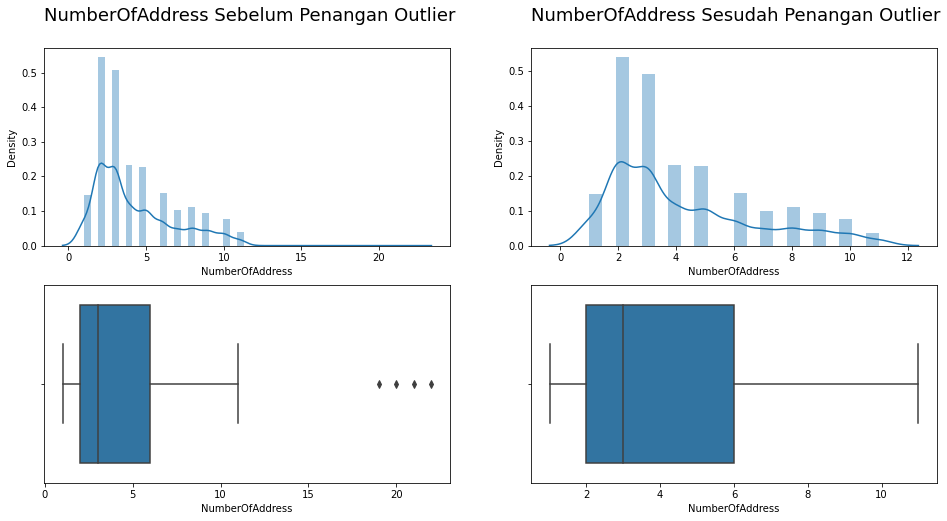

In [ ]:
# Melakukan perbandingan sebelum dan sesudah pada kolom NumberOfAddress
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['NumberOfAddress'])
plt.title('NumberOfAddress Sebelum Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,2)
sns.distplot(df_z['NumberOfAddress'])
plt.title('NumberOfAddress Sesudah Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,3)
sns.boxplot(df['NumberOfAddress'])
plt.subplot(2,2,4)
sns.boxplot(df_z['NumberOfAddress'])
plt.show()

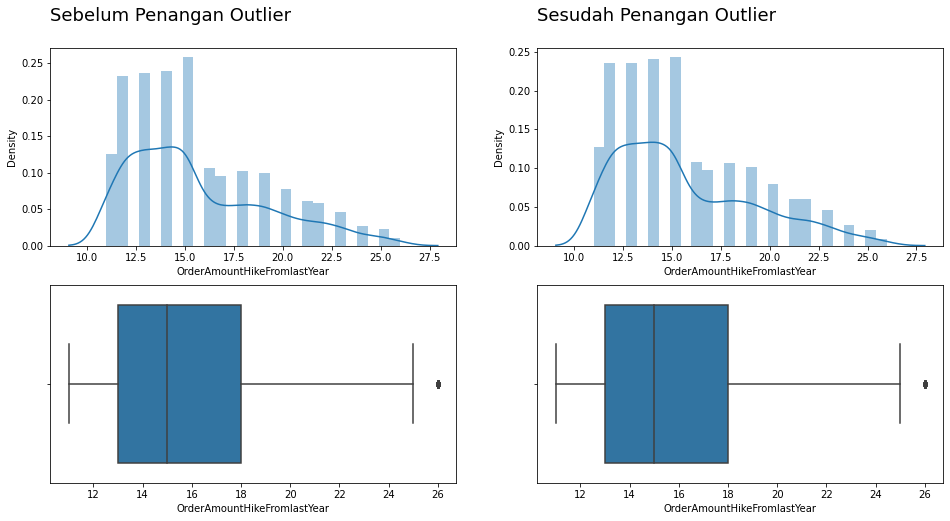

In [ ]:
# Melakukan perbandingan sebelum dan sesudah pada kolom OrderAmountHikeFromlastYear
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['OrderAmountHikeFromlastYear'])
plt.title('Sebelum Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,2)
sns.distplot(df_z['OrderAmountHikeFromlastYear'])
plt.title('Sesudah Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,3)
sns.boxplot(df['OrderAmountHikeFromlastYear'])
plt.subplot(2,2,4)
sns.boxplot(df_z['OrderAmountHikeFromlastYear'])
plt.show()

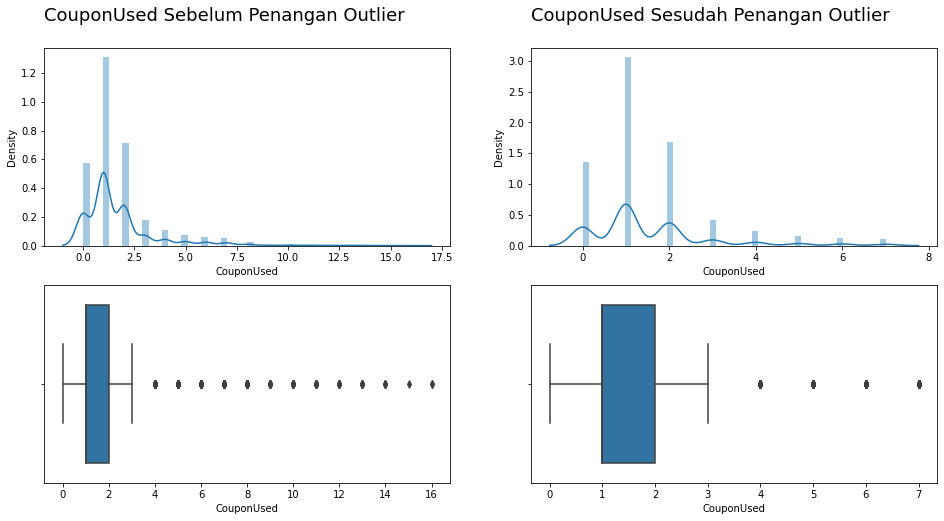

In [ ]:
# Melakukan perbandingan sebelum dan sesudah pada kolom CouponUsed
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['CouponUsed'])
plt.title('CouponUsed Sebelum Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,2)
sns.distplot(df_z['CouponUsed'])
plt.title('CouponUsed Sesudah Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,3)
sns.boxplot(df['CouponUsed'])
plt.subplot(2,2,4)
sns.boxplot(df_z['CouponUsed'])
plt.show()

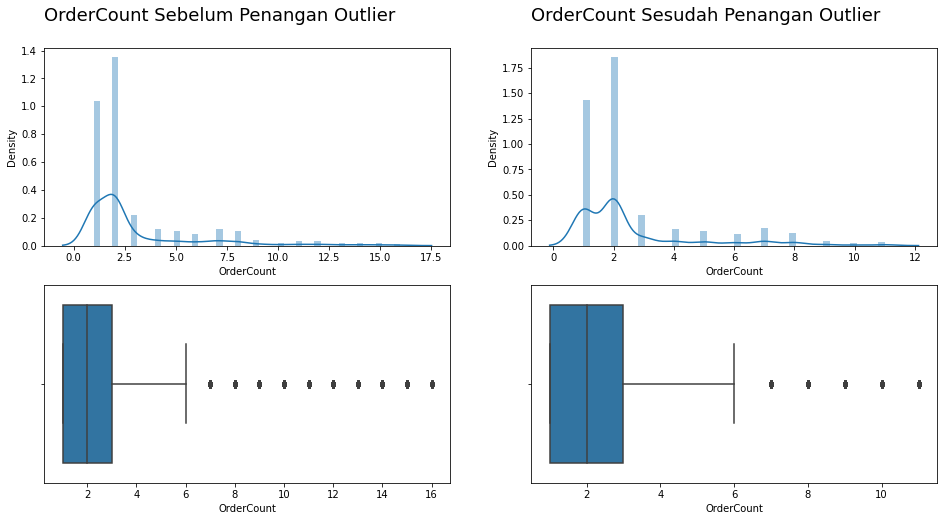

In [ ]:
# Melakukan perbandingan sebelum dan sesudah pada kolom OrderCount
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['OrderCount'])
plt.title('OrderCount Sebelum Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,2)
sns.distplot(df_z['OrderCount'])
plt.title('OrderCount Sesudah Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,3)
sns.boxplot(df['OrderCount'])
plt.subplot(2,2,4)
sns.boxplot(df_z['OrderCount'])
plt.show()

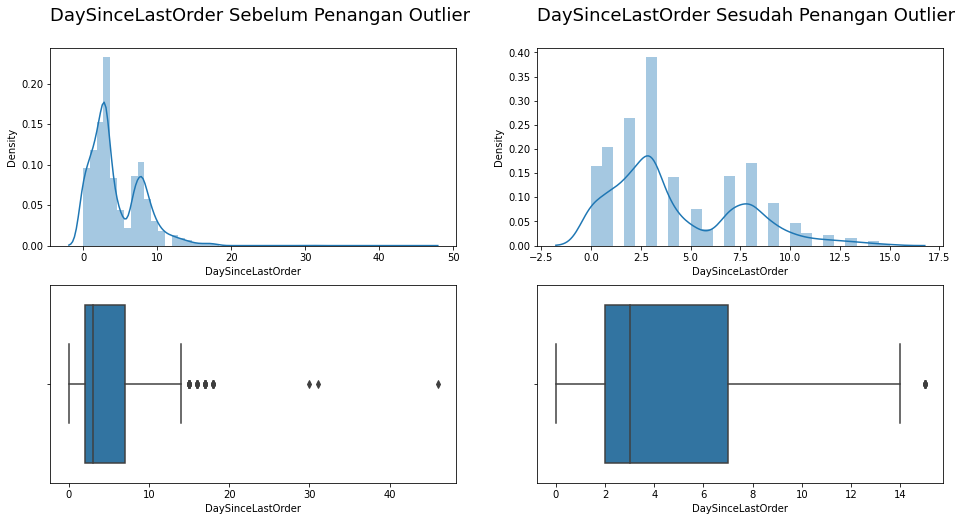

In [ ]:
# Melakukan perbandingan sebelum dan sesudah pada kolom DaySinceLastOrder
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['DaySinceLastOrder'])
plt.title('DaySinceLastOrder Sebelum Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,2)
sns.distplot(df_z['DaySinceLastOrder'])
plt.title('DaySinceLastOrder Sesudah Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,3)
sns.boxplot(df['DaySinceLastOrder'])
plt.subplot(2,2,4)
sns.boxplot(df_z['DaySinceLastOrder'])
plt.show()

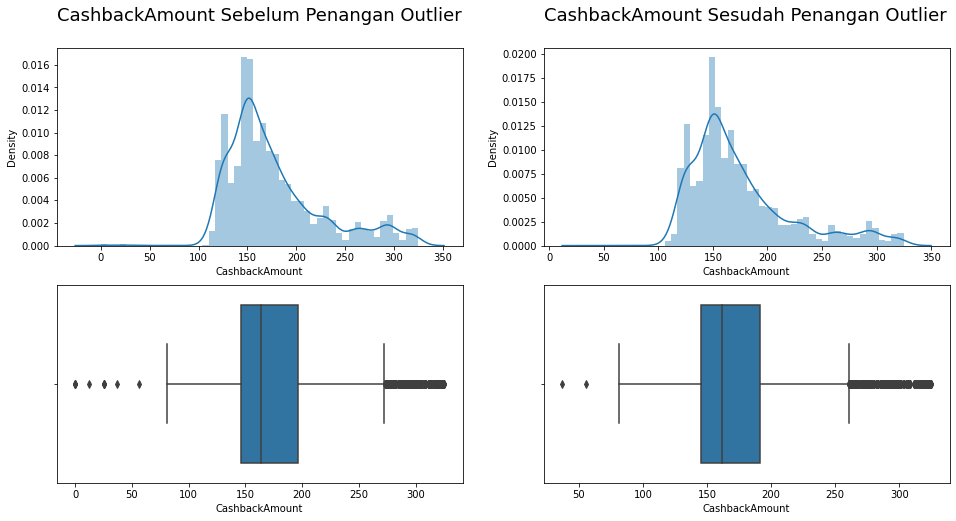

In [ ]:
# Melakukan perbandingan sebelum dan sesudah pada kolom CashbackAmount
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['CashbackAmount'])
plt.title('CashbackAmount Sebelum Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,2)
sns.distplot(df_z['CashbackAmount'])
plt.title('CashbackAmount Sesudah Penangan Outlier\n', loc='left', size=18)
plt.subplot(2,2,3)
sns.boxplot(df['CashbackAmount'])
plt.subplot(2,2,4)
sns.boxplot(df_z['CashbackAmount'])
plt.show()

### Kesimpulan hasil Data Cleansing:
*  Penanganan *missing data* berhasil dilakukan dengan metode *impute missing value*.
*  Tidak ada data yang duplikat sehingga tidak perlu dilakukan proses penanganan *duplicated data*.
*  Pada kolom WarehouseToHome, NumberOfAddress, OrderCount, DaySinceLastOrder, CashbackAmount masih terdapat *outlier* meskipun sudah dilakukan proses penanganan outlier dengan rentang IQR untuk selanjutnya akan ditangani dengan *log transformation* pada tahap <mark style="background-color: silver">feature transformation</mark>  

### Feature Transformation



Transformasi fitur merupakan langkah penting dalam rekayasa fitur data numerik dan digunakan untuk menangani data skewed.

Data skewed ada di kolom Tenure, WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, dan CashbackAmount.

#### Log Transformation
Transformasi variabel *skewed* juga dapat membantu memperbaiki distribusi variabel. Ini bisa berupa transformasi logaritmik, akar kuadrat, atau kuadrat.

In [16]:
# Membuat copy dataset
df_log=df_z.copy()

In [17]:
df_log["Tenure"] = df_log["Tenure"].map(lambda i: np.log(i) if i > 0 else 0)
print(df_z["Tenure"].skew())
print(df_log["Tenure"].skew())

0.7430948539804104
-0.5351932675314267


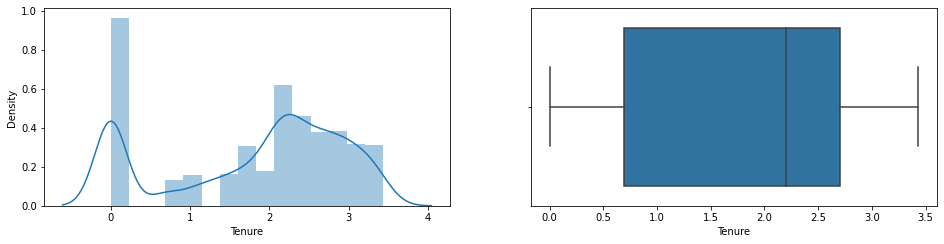

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_log['Tenure'])
plt.subplot(2,2,2)
sns.boxplot(df_log['Tenure'])

In [18]:
df_log["WarehouseToHome"] = df_log["OrderAmountHikeFromlastYear"].map(lambda i: np.log(i) if i > 0 else 0)
print(df_z["OrderAmountHikeFromlastYear"].skew())
print(df_log["OrderAmountHikeFromlastYear"].skew())

0.807504182926639
0.807504182926639


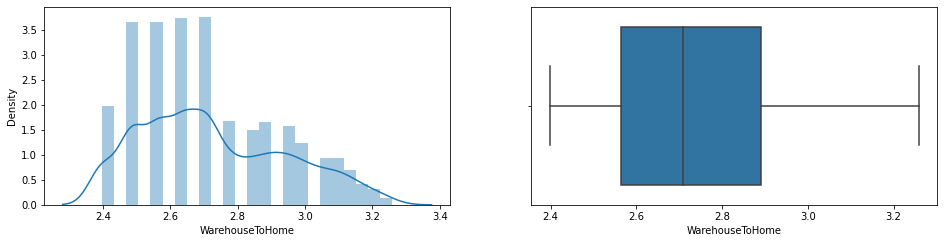

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_log['WarehouseToHome'])
plt.subplot(2,2,2)
sns.boxplot(df_log['WarehouseToHome'])

In [19]:
df_log["CouponUsed"] = df_log["CouponUsed"].map(lambda i: np.log(i) if i > 0 else 0)
print(df_z["CouponUsed"].skew())
print(df_log["CouponUsed"].skew())

1.719500913121595
1.2452839707242769


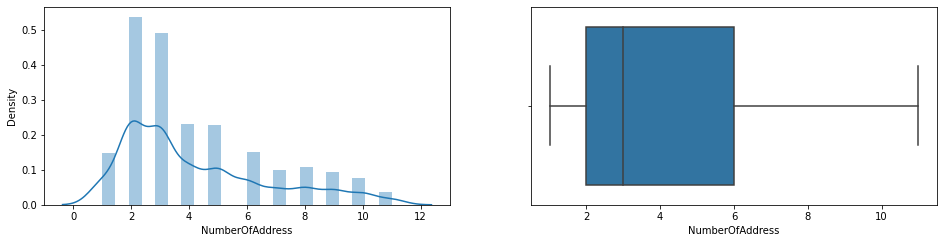

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_log['NumberOfAddress'])
plt.subplot(2,2,2)
sns.boxplot(df_log['NumberOfAddress'])

In [20]:
df_log["OrderCount"] = df_log["OrderCount"].map(lambda i: np.log(i) if i > 0 else 0)
print(df_z["OrderCount"].skew())
print(df_log["OrderCount"].skew())

1.9514009085614155
0.7427771303180801


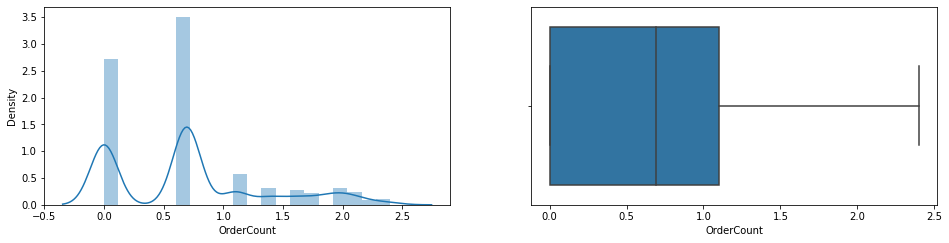

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_log['OrderCount'])
plt.subplot(2,2,2)
sns.boxplot(df_log['OrderCount'])

In [21]:
df_log["DaySinceLastOrder"] = df_log["DaySinceLastOrder"].map(lambda i: np.log(i) if i > 0 else 0)
print(df_z["DaySinceLastOrder"].skew())
print(df_log["DaySinceLastOrder"].skew())

0.795664646882559
-0.09414057699000038


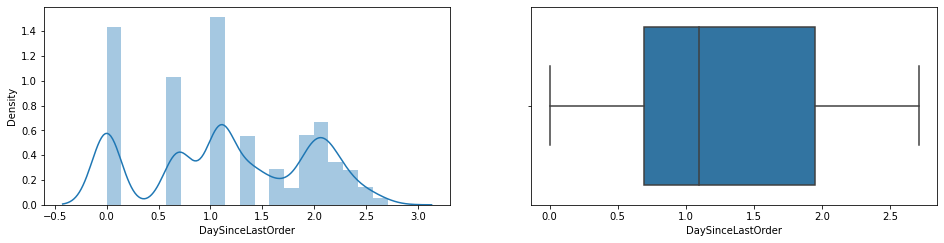

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_log['DaySinceLastOrder'])
plt.subplot(2,2,2)
sns.boxplot(df_log['DaySinceLastOrder'])

In [22]:
df_log["CashbackAmount"] = df_log["CashbackAmount"].map(lambda i: np.log(i) if i > 0 else 0)
print(df_z["CashbackAmount"].skew())
print(df_log["CashbackAmount"].skew())

1.309666973417291
0.7201790161120151


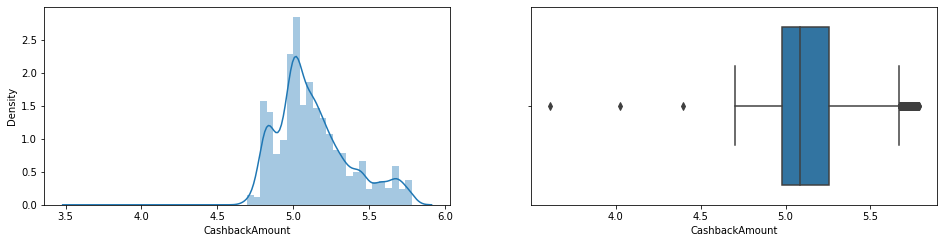

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_log['CashbackAmount'])
plt.subplot(2,2,2)
sns.boxplot(df_log['CashbackAmount'])

### Kesimpulan setelah dilakukan Log Transformation:
*  Sebaran distribusi terlihat lebih normal walaupun masih terdapat kolom yang outlier.
*  Setelah melakukan *log transformation*, kita dapat melakukan *scaling transformation* dengan menggunakan library preprocessing scikit-learn untuk mengonversi data ke dalam skala yang sama.

### Feature Scaling
**Robust Scaler**. Ini menggunakan metode yang mirip dengan scaler Min-Max tetapi sebaliknya menggunakan rentang interkuartil yang membuatnya cukup kuat untuk outlier.

In [23]:
# Membuat copy dataset
df_t=df_log.copy()

# Import library
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Standarisasi
df_t['std_Tenure'] = StandardScaler().fit_transform(df_t['Tenure'].values.reshape(len(df_t), 1))
df_t['std_WarehouseToHome'] = StandardScaler().fit_transform(df_t['WarehouseToHome'].values.reshape(len(df_t), 1))

# Normalisasi
df_t['CashbackAmount_normalisasi'] = MinMaxScaler().fit_transform(df_t['CashbackAmount'].values.reshape(len(df_t), 1))
df_t['NumberOfDeviceRegistered_normalisasi'] = MinMaxScaler().fit_transform(df_t['NumberOfDeviceRegistered'].values.reshape(len(df_t), 1))
df_t['DaySinceLastOrder_normalisasi'] = MinMaxScaler().fit_transform(df_t['DaySinceLastOrder'].values.reshape(len(df_t), 1))

df_t

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,std_Tenure,std_WarehouseToHome,CashbackAmount_normalisasi,NumberOfDeviceRegistered_normalisasi,DaySinceLastOrder_normalisasi
0,1,1.386294,Mobile Phone,3,2.397895,Debit Card,Female,3.0,3,Laptop & Accessory,...,11.0,0.000000,0.000000,1.609438,5.074736,-0.371408,-1.512454,0.673926,0.4,0.594316
1,1,2.197225,Mobile Phone,1,2.708050,UPI,Male,3.0,4,Mobile Phone,...,15.0,0.000000,0.000000,0.000000,4.794964,0.345473,-0.086555,0.545122,0.6,0.000000
2,1,2.197225,Mobile Phone,1,2.639057,Debit Card,Male,2.0,4,Mobile Phone,...,14.0,0.000000,0.000000,1.098612,4.789822,0.345473,-0.403741,0.542755,0.6,0.405684
3,1,0.000000,Mobile Phone,3,3.135494,Debit Card,Male,2.0,4,Laptop & Accessory,...,23.0,0.000000,0.000000,1.098612,4.898362,-1.596926,1.878567,0.592725,0.6,0.405684
4,1,0.000000,Mobile Phone,1,2.397895,Credit Card,Male,3.0,3,Mobile Phone,...,11.0,0.000000,0.000000,1.098612,4.864453,-1.596926,-1.512454,0.577114,0.4,0.405684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,2.302585,Computer,1,2.890372,Credit Card,Male,3.0,2,Laptop & Accessory,...,18.0,0.000000,0.693147,1.386294,5.015357,0.438614,0.751647,0.646589,0.2,0.511916
5626,0,2.564949,Mobile Phone,1,2.772589,Credit Card,Male,3.0,5,Fashion,...,16.0,0.000000,0.693147,1.098612,5.415700,0.670551,0.210153,0.830902,0.8,0.405684
5627,0,0.000000,Mobile Phone,1,3.044522,Debit Card,Male,3.0,2,Laptop & Accessory,...,21.0,0.000000,0.693147,1.386294,5.228002,-1.596926,1.460335,0.744488,0.2,0.511916
5628,0,3.135494,Computer,3,2.708050,Credit Card,Male,4.0,5,Laptop & Accessory,...,15.0,0.693147,0.693147,2.197225,5.186827,1.174926,-0.086555,0.725531,0.8,0.811368


### Feature Encoding
Mengubah value dari data yang masih berbentuk string untuk diubah ke dalam bentuk numerik menggunakan Label Encoding dan One Hot Encoding

#### Label Encoding

In [24]:
# Mapping Gender
mapping_gender = {
    'Male'   : 1,
    'Female' : 0
}
df_t['Gender'] = df_t['Gender'].map(mapping_gender)

#### One Hot Encoding

In [25]:
for cat in ['MaritalStatus', 'PreferredLoginDevice', 'PreferedOrderCat', 'PreferredPaymentMode']:
    onehots = pd.get_dummies(df_t[cat], prefix=cat)
    df_t = df_t.join(onehots)

In [26]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Churn                                 5350 non-null   int64  
 1   Tenure                                5350 non-null   float64
 2   PreferredLoginDevice                  5350 non-null   object 
 3   CityTier                              5350 non-null   int64  
 4   WarehouseToHome                       5350 non-null   float64
 5   PreferredPaymentMode                  5350 non-null   object 
 6   Gender                                5350 non-null   int64  
 7   HourSpendOnApp                        5350 non-null   float64
 8   NumberOfDeviceRegistered              5350 non-null   int64  
 9   PreferedOrderCat                      5350 non-null   object 
 10  SatisfactionScore                     5350 non-null   int64  
 11  MaritalStatus    

### Handle Class Imbalance
Data tidak seimbang mengacu pada dataset di mana kelas target memiliki distribusi pengamatan yang tidak merata, yaitu satu label kelas memiliki jumlah pengamatan yang sangat tinggi dan yang lainnya memiliki jumlah pengamatan yang sangat rendah. 
Ketidakseimbangan data adalah masalah umum dalam pembelajaran mesin. 
Sebagai contoh akibat data tidak seimbang, model akan memprediksi hampir setiap orang sebagai vegetarian karena algoritma akan mengingat kelas vegetarian yang memiliki distribusi lebih tinggi.

In [27]:
# Class imbalance pada target (Churn)
df_t['Churn'].value_counts()

0    4438
1     912
Name: Churn, dtype: int64

In [28]:
# Pemisahan features vs target
X = df_t[[col for col in df_t.columns if (str(df_t[col].dtype) != 'object') and col not in ['Churn']]]
y = df_t['Churn'].values
print(X.shape)
print(y.shape)

(5350, 34)
(5350,)


In [29]:
X_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X, y)
smenn = SMOTEENN()
X_over_SMOTEENN, y_over_SMOTEENN = smenn.fit_resample(X, y)

#### Metode SMOTE dalam menghandle imbalance data yang terjadi pada target
SMOTE (synthetic minority oversampling technique) adalah salah satu metode *oversampling* yang paling umum digunakan untuk menyelesaikan masalah ketidakseimbangan. SMOTE melihat ke dalam instance kelas minoritas dan menggunakan *k nearest neighbor* untuk memilih tetangga terdekat secara acak, dan sebuah instance sintetis dibuat secara acak di ruang *feature*.

#### Metode gabungan SMOTE dengan Edited Nearest Neighbor (ENN)
Ada banyak metode untuk mengatasi ketidakseimbangan dataset dalam pemodelan klasifikasi dengan cara oversampling kelas minoritas atau undersampling kelas mayoritas. Untuk meningkatkan kinerja model lebih jauh, banyak peneliti menyarankan untuk menggabungkan metode oversampling dan undersampling untuk menyeimbangkan dataset dengan lebih baik.

In [30]:
print('--Original--')
print(pd.Series(y).value_counts())
print('--Under Sampling--')
print(pd.Series(y_under).value_counts())
print('--Over Sampling--')
print(pd.Series(y_over).value_counts())
print('--SMOTE--')
print(pd.Series(y_over_SMOTE).value_counts())
print('--SMOTEENN--')
print(pd.Series(y_over_SMOTEENN).value_counts())

--Original--
0    4438
1     912
dtype: int64
--Under Sampling--
0    912
1    912
dtype: int64
--Over Sampling--
1    4438
0    4438
dtype: int64
--SMOTE--
1    4438
0    4438
dtype: int64
--SMOTEENN--
1    4432
0    4040
dtype: int64


### Feature Enginnering
-  Feature Engineering adalah bagian penting dari dataset preparation — ini membantu menentukan atribut yang mewakili pola perilaku yang terkait dengan interaksi pelanggan dengan produk atau layanan.
-  Tujuan dari Feature Engineering adalah untuk membuat fitur baru (juga disebut variabel eksplanasi atau prediktor) untuk mewakili sebanyak mungkin informasi dari seluruh dataset dalam satu tabel.

###  Feature selection (membuang feature yang kurang relevan atau redundan)
-  Feature selection mengacu pada teknik ilmu data yang mengidentifikasi fitur yang diekstraksi sebelumnya dan memilih subkelompok yang paling dekat mempengaruhi variabel target (Churn). Ini mengarah ke kumpulan data yang hanya berisi informasi paling relevan tentang atribut yang memengaruhi churn.
-  Feature Selection adalah proses mereduksi variabel/fitur dengan menghilangkan fitur yang tidak ada hubungannya ataupun berkorelasi rendah.

In [31]:
df_t

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,PreferredPaymentMode_COD,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI
0,1,1.386294,Mobile Phone,3,2.397895,Debit Card,0,3.0,3,Laptop & Accessory,...,0,0,1,0,0,0,0,1,0,0
1,1,2.197225,Mobile Phone,1,2.708050,UPI,1,3.0,4,Mobile Phone,...,0,0,0,1,0,0,0,0,0,1
2,1,2.197225,Mobile Phone,1,2.639057,Debit Card,1,2.0,4,Mobile Phone,...,0,0,0,1,0,0,0,1,0,0
3,1,0.000000,Mobile Phone,3,3.135494,Debit Card,1,2.0,4,Laptop & Accessory,...,0,0,1,0,0,0,0,1,0,0
4,1,0.000000,Mobile Phone,1,2.397895,Credit Card,1,3.0,3,Mobile Phone,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,2.302585,Computer,1,2.890372,Credit Card,1,3.0,2,Laptop & Accessory,...,0,0,1,0,0,0,1,0,0,0
5626,0,2.564949,Mobile Phone,1,2.772589,Credit Card,1,3.0,5,Fashion,...,1,0,0,0,0,0,1,0,0,0
5627,0,0.000000,Mobile Phone,1,3.044522,Debit Card,1,3.0,2,Laptop & Accessory,...,0,0,1,0,0,0,0,1,0,0
5628,0,3.135494,Computer,3,2.708050,Credit Card,1,4.0,5,Laptop & Accessory,...,0,0,1,0,0,0,1,0,0,0


In [32]:
# Drop kolom yang redundan karena sudah ditransformasi dan kolom CoupounUsed untuk menghindari multicollinearity
df_t = df_t.drop(columns=['PreferredLoginDevice', 'MaritalStatus','PreferedOrderCat', 'WarehouseToHome','NumberOfDeviceRegistered', 'PreferredPaymentMode','Tenure', 'WarehouseToHome','CouponUsed'])

In [ ]:
df_t

,Churn,CityTier,Gender,HourSpendOnApp,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,PreferredPaymentMode_COD,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI
0,1,3,0,3.0,2,9,1,11.0,0.000000,1.609438,...,0,0,1,0,0,0,0,1,0,0
1,1,1,1,3.0,3,7,1,15.0,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
2,1,1,1,2.0,3,6,1,14.0,0.000000,1.098612,...,0,0,0,1,0,0,0,1,0,0
3,1,3,1,2.0,5,8,0,23.0,0.000000,1.098612,...,0,0,1,0,0,0,0,1,0,0
4,1,1,1,3.0,5,3,0,11.0,0.000000,1.098612,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,1,1,3.0,1,6,0,18.0,0.693147,1.386294,...,0,0,1,0,0,0,1,0,0,0
5626,0,1,1,3.0,5,6,0,16.0,0.693147,1.098612,...,1,0,0,0,0,0,1,0,0,0
5627,0,1,1,3.0,4,3,1,21.0,0.693147,1.386294,...,0,0,1,0,0,0,0,1,0,0
5628,0,3,1,4.0,4,4,0,15.0,0.693147,2.197225,...,0,0,1,0,0,0,1,0,0,0


#### Chi Square
Uji chi-square Pearson adalah uji hipotesis yang digunakan untuk mengetahui apakah ada hubungan yang signifikan antara dua variabel kategori dalam data. Nilai chi square yang lebih rendah menunjukkan bahwa kedua variabel (fitur dan target) adalah independen. Nilai yang lebih tinggi untuk dua variabel berarti menunjukan variabel adalah dependen.

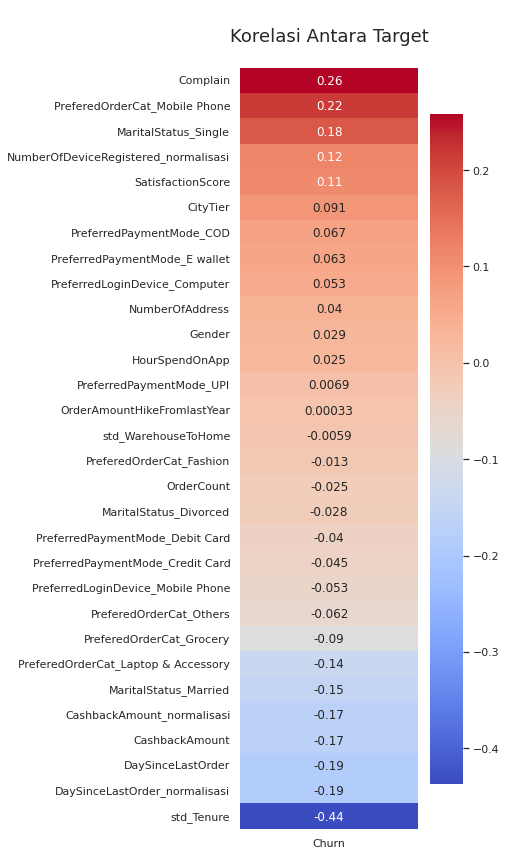

In [ ]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,14))
    sns.set(font_scale=1)
    
    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

corr_for_target(df_t, 'Churn', 'Korelasi Antara Target')

In [33]:
# Menghitung chi-square
cnt=pd.crosstab(df_t['Churn'], df_t['Complain'], margins = True)
stat, p, dof, expected = scipy.stats.chi2_contingency(cnt)
print(stat)
prob= 0.95  # confidence interval or probability
critical = scipy.stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f \n' % (prob, critical, stat))
# critical value is calculated from chi sqaure distribution table

# H0 (Null Hypothesis): langganan ecommerce tidak tergantung pada komplain yang dilakukan pelanggan
# H1 (Alternate Hypothesis):  langganan ecommerce tergantung pada komplain yang dilakukan pelanggan


# Evaluasi chi-square
# Interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Bergantung/Dependent (reject Null Hypothesis)')
else:
    print('Mandiri/Independent (fail to reject Null Hypothesis)')

356.7334821819926
probability=0.950, critical=9.488, stat=356.733 

significance=0.050, p=0.000
Bergantung/Dependent (reject Null Hypothesis)


In [34]:
# Menghitung chi-square
cnt=pd.crosstab(df_t['Churn'], df_t['PreferedOrderCat_Mobile Phone'], margins = True)
stat, p, dof, expected = scipy.stats.chi2_contingency(cnt)
print(stat)
prob= 0.95  # confidence interval or probability
critical = scipy.stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f \n' % (prob, critical, stat))
# critical value is calculated from chi sqaure distribution table

# H0 (Null Hypothesis): langganan ecommerce tidak tergantung pada kategori pesanan pilihan HP yang dipilih pelanggan
# H1 (Alternate Hypothesis):  langganan ecommerce tergantung pada kategori pesanan pilihan HP yang dipilih pelanggan


# Evaluasi chi-square
# Interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Bergantung/Dependent (reject Null Hypothesis)')
else:
    print('Mandiri/Independent (fail to reject Null Hypothesis)')

251.2861890622633
probability=0.950, critical=9.488, stat=251.286 

significance=0.050, p=0.000
Bergantung/Dependent (reject Null Hypothesis)


In [36]:
# Menghitung chi-square
cnt=pd.crosstab(df_t['Churn'], df_t['MaritalStatus_Single'], margins = True)
stat, p, dof, expected = scipy.stats.chi2_contingency(cnt)
print(stat)
prob= 0.95  # confidence interval or probability
critical = scipy.stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f \n' % (prob, critical, stat))
# critical value is calculated from chi sqaure distribution table

# H0 (Null Hypothesis): langganan ecommerce tidak tergantung pada status pernikahan single yang dimiliki pelanggan
# H1 (Alternate Hypothesis):  langganan ecommerce tergantung pada status pernikahan single yang dimiliki pelanggan


# Evaluasi chi-square
# Interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Bergantung/Dependent (reject Null Hypothesis)')
else:
    print('Mandiri/Independent (fail to reject Null Hypothesis)')

173.89585755234114
probability=0.950, critical=9.488, stat=173.896 

significance=0.050, p=0.000
Bergantung/Dependent (reject Null Hypothesis)


In [35]:
# Menghitung chi-square
cnt=pd.crosstab(df_t['Churn'], df_t['SatisfactionScore'], margins = True)
stat, p, dof, expected = scipy.stats.chi2_contingency(cnt)
print(stat)
prob= 0.95  # confidence interval or probability
critical = scipy.stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f \n' % (prob, critical, stat))
# critical value is calculated from chi sqaure distribution table

# H0 (Null Hypothesis): langganan ecommerce tidak tergantung pada skor kepuasan
# H1 (Alternate Hypothesis):  langganan ecommerce tergantung pada skor kepuasan


# Evaluasi chi-square
# Interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Bergantung/Dependent (reject Null Hypothesis)')
else:
    print('Mandiri/Independent (fail to reject Null Hypothesis)')

76.52808173287323
probability=0.950, critical=18.307, stat=76.528 

significance=0.050, p=0.000
Bergantung/Dependent (reject Null Hypothesis)


In [ ]:
# Menghitung chi-square
cnt=pd.crosstab(df_t['Churn'], df_t['NumberOfDeviceRegistered_normalisasi'], margins = True)
stat, p, dof, expected = scipy.stats.chi2_contingency(cnt)
print(stat)
prob= 0.95  # confidence interval or probability
critical = scipy.stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f \n' % (prob, critical, stat))
# critical value is calculated from chi sqaure distribution table

# H0 (Null Hypothesis): langganan ecommerce tidak tergantung pada jumlah perangkat yang terdaftar yang dimiliki pelanggan
# H1 (Alternate Hypothesis):  langganan ecommerce tergantung pada jumlah perangkat yang terdaftar yang dimiliki pelanggan


# Evaluasi chi-square
# Interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Bergantung/Dependent (reject Null Hypothesis)')
else:
    print('Mandiri/Independent (fail to reject Null Hypothesis)')

92.2253857913986
probability=0.950, critical=21.026, stat=92.225 

significance=0.050, p=0.000
Bergantung/Dependent (reject Null Hypothesis)


In [37]:
# Menghitung chi-square
cnt=pd.crosstab(df_t['Churn'], df_t['std_WarehouseToHome'], margins = True)
stat, p, dof, expected = scipy.stats.chi2_contingency(cnt)
print(stat)
prob= 0.95  # confidence interval or probability
critical = scipy.stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f \n' % (prob, critical, stat))
# critical value is calculated from chi sqaure distribution table

# H0 (Null Hypothesis): langganan ecommerce tidak tergantung pada gudang ke rumah yang dimiliki pelanggan
# H1 (Alternate Hypothesis):  langganan ecommerce tergantung pada gudang ke rumah yang dimiliki pelanggan


# Evaluasi chi-square
# Interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Bergantung/Dependent (reject Null Hypothesis)')
else:
    print('Mandiri/Independent (fail to reject Null Hypothesis)')

43.85002761377251
probability=0.950, critical=46.194, stat=43.850 

significance=0.050, p=0.079
Mandiri/Independent (fail to reject Null Hypothesis)


In [38]:
# Menghitung chi-square
cnt=pd.crosstab(df_t['Churn'], df_t['CityTier'], margins = True)
stat, p, dof, expected = scipy.stats.chi2_contingency(cnt)
print(stat)
prob= 0.95  # confidence interval or probability
critical = scipy.stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f \n' % (prob, critical, stat))
# critical value is calculated from chi sqaure distribution table

# H0 (Null Hypothesis): langganan ecommerce tidak tergantung pada tingkat kota yang dimiliki pelanggan
# H1 (Alternate Hypothesis):  langganan ecommerce tergantung pada tingkat kota yang dimiliki pelanggan


# Evaluasi chi-square
# Interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Bergantung/Dependent (reject Null Hypothesis)')
else:
    print('Mandiri/Independent (fail to reject Null Hypothesis)')

44.60086123783258
probability=0.950, critical=12.592, stat=44.601 

significance=0.050, p=0.000
Bergantung/Dependent (reject Null Hypothesis)


### Feature extraction (membuat feature baru dari feature yang sudah ada)

### 4 Feature baru yang bisa dibuat:

#### Average Cashback per Order

In [ ]:
df_t['avg_cashbk_per_order'] =df_t['CashbackAmount'] / df_t['OrderCount']

#### Average Spend On App per Order

In [ ]:
df_t['avg_HourSpendOnApp_per_order'] =df_t['HourSpendOnApp'] / df_t['OrderCount']

#### Average Day Since Last Order per Order

In [ ]:
df_t['avg_DaySinceLastOrder_normalisasi_order'] =df_t['DaySinceLastOrder_normalisasi'] / df_t['OrderCount']

#### Average Complain per Order

In [ ]:
df_t['avg_Complaini_order'] =df_t['Complain'] / df_t['OrderCount']

### Kesimpulan hasil Feature Engineering:
*  Pada tahap Feature Selection dilakukan: 
  *  Penghapusan feature yang redundan, yaitu: PreferredLoginDevice, MaritalStatus,PreferedOrderCat, WarehouseToHome,dan NumberOfDeviceRegistered.
  *  Untuk menghindari multicollinearity dilakukan drop pada feature CouponUsed.
  *  Tes chi-square dengan hasil: Churn memiliki hubungan (tergantung/dependent) paling tinggi dengan feature Complain, kemudian disusul dengan PreferedOrderCat_Mobile Phone, MaritalStatus_Single, SatisfactionScore, NumberOfDeviceRegistered_normalisasi, NumberOfDeviceRegistered, dan Citytier.

*  Pada tahap Feature Extraction dapat dibuatkan feature:
   *  Average Cashback per Order
   *  Average Spend On App per Order
   *  Average Day Since Last Order per Order
   *  Average Complain per Order


# Modeling
-  Modeling yaitu membuat model prediksi/klasifikasi menggunakan algoritma tertentu dengan menggunakan data training, yang kemudian divalidasi dengan menggunakan data testing.
-  Model churn prediction mengklasifikasikan pengguna yang akan churn dan tidak churn di masa mendatang, sehingga perusahaan ecommerce mampu membuat kebijakan dan strategi untuk meretensi pelanggan yang akan churn.

-  Berbagai macam algoritma prediksi/klasifikasi mulai dari: 
    1. Logsitic Regression, 
    2. K-Nearest Neighbor, 
    3. Decision Tree, 
    4. Support Vector Machine, 
    5. Naive Bayes, 
    6. Random Forest, 
    7. Gradient Boosting,
    8. Neural Network


### Split Train Test Data
Pemisahan uji-latihan adalah teknik untuk mengevaluasi kinerja algoritme pembelajaran mesin.
- Train Dataset: Digunakan agar sesuai dengan model pembelajaran mesin.
- Test Dataset: Digunakan untuk mengevaluasi model machine learning yang sesuai.

- Persentase pembagian yang umum adalah:
 - Train: 80%, Test: 20%
 - Train: 67%, Test: 33%
 - Train: 50%, Test: 50%

In [39]:
X = X_over_SMOTEENN
y = y_over_SMOTEENN

In [41]:
# Memisahkan data menjadi Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [55]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [56]:
def get_metrics(y_pred, y_act, model_name):
  recall =  recall_score(y_act, y_pred)
  precision = precision_score(y_act, y_pred)
  roc_auc = roc_auc_score(y_act, y_pred)
  f1 = f1_score(y_act, y_pred)
  accuracy = balanced_accuracy_score(y_act, y_pred)

  metrics_result = dict(model_name=model_name, 
                        recall=recall, 
                        precision=precision, 
                        roc_auc=roc_auc, 
                        f1=f1,
                        accuracy=accuracy)
  
  return metrics_result


def prediction(x_train, y_train, x_test, y_test, clf, model_name='decision tree'):
  
  clf = clf
  clf.fit(x_train, y_train)
  y_test_pred = clf.predict(x_test)
  y_train_pred = clf.predict(x_train)


  result = dict()
  test_result = get_metrics(y_pred=y_test_pred, y_act=y_test, model_name=model_name)
  train_result = get_metrics(y_pred=y_train_pred, y_act=y_train, model_name=model_name)

  result['test'] = test_result
  result['train'] = train_result
  result['y_test'] = y_test
  result['y_test_pred'] = y_test_pred
  result['y_train'] = y_train
  result['y_train_pred'] = y_train_pred
  result['clf'] = clf
  result['x_train'] = x_train
  result['x_test'] = x_test

  del clf

  return result
  
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

###  Decision Tree Classifier

In [44]:
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_over_SMOTEENN, y_over_SMOTEENN)

DecisionTreeClassifier()

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2827
           1       1.00      1.00      1.00      3103

    accuracy                           1.00      5930
   macro avg       1.00      1.00      1.00      5930
weighted avg       1.00      1.00      1.00      5930



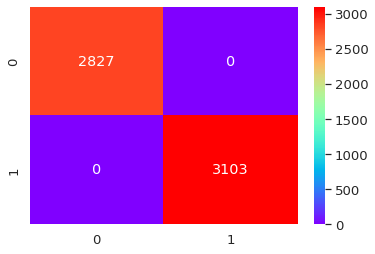

In [45]:
## Performance Matrix
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
# Confusion matrix training Data
cm_train_dt = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_dt, annot = True,fmt = 'd', cmap='rainbow')

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1213
           1       1.00      1.00      1.00      1329

    accuracy                           1.00      2542
   macro avg       1.00      1.00      1.00      2542
weighted avg       1.00      1.00      1.00      2542

Confusion Matrix


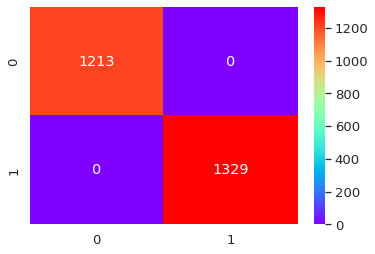

In [46]:
## Performance Matrix
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
# Confusion matrix test Data
cm_test_dt = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_dt, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


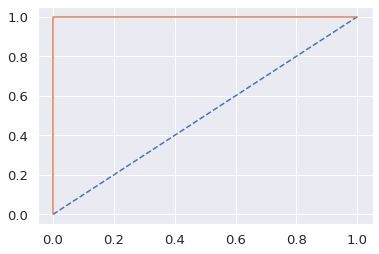

In [47]:
# Memprediksi probabilitas
probs = DT_model.predict_proba(X_train)
# Mempertahankan probabilitas hanya untuk hasil positif
probs = probs[:, 1]
# Menghitun AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# Menghitun roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve
plt.plot(train_fpr, train_tpr)

AUC: 1.000


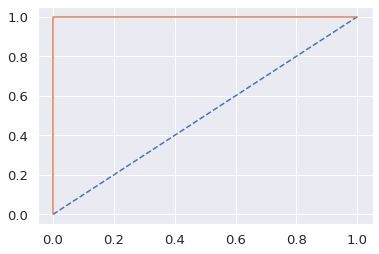

In [48]:
# Memprediksi probabilitas
probs = DT_model.predict_proba(X_test)
# Mempertahankan probabilitas hanya untuk hasil positif
probs = probs[:, 1]
# Menghitung AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# Menghitung roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve
plt.plot(test_fpr, test_tpr)

### Random Forest

In [ ]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_over_SMOTEENN, y_over_SMOTEENN)

RandomForestClassifier(random_state=1)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2817
           1       1.00      1.00      1.00      3103

    accuracy                           1.00      5920
   macro avg       1.00      1.00      1.00      5920
weighted avg       1.00      1.00      1.00      5920

Confusion Matrix


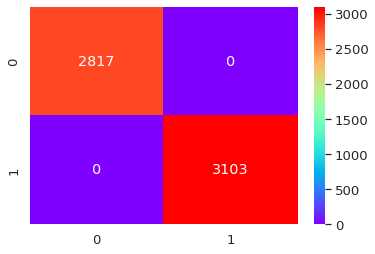

In [ ]:
## Performance Matrix
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
# Confusion matrix training Data
cm_train_rf = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_rf, annot = True,fmt = 'd', cmap='rainbow')

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1211
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      2538
   macro avg       1.00      1.00      1.00      2538
weighted avg       1.00      1.00      1.00      2538

Confusion Matrix


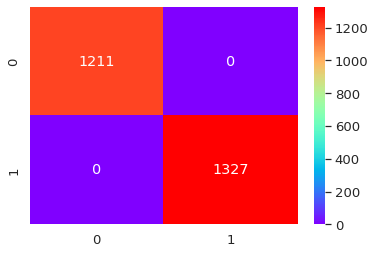

In [ ]:
## Performance Matrix
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
# Confusion matrix test Data
cm_test_rf = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_rf, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


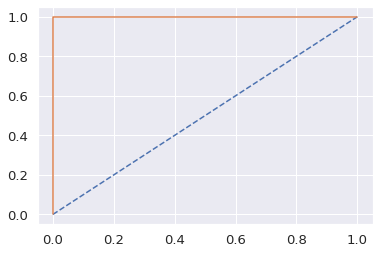

In [ ]:
# Memprediksi probabilitas
probs = RF_model.predict_proba(X_train)
# Mempertahankan probabilitas hanya untuk hasil positif
probs = probs[:, 1]
# Menghitung AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# Menghitung roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve
plt.plot(train_fpr, train_tpr)

AUC: 1.000


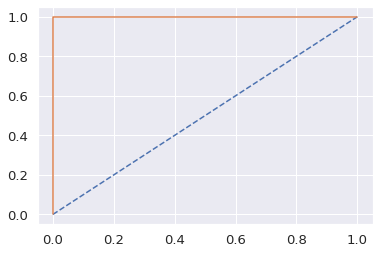

In [ ]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# Mempertahankan probabilitas hanya untuk hasil positif
probs = probs[:, 1]
# Menghitung AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# Menghitung roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve
plt.plot(test_fpr, test_tpr)

### Catboost

In [ ]:
CB_model=cb.CatBoostClassifier(n_estimators=100,random_state=1)
CB_model.fit(X_over_SMOTEENN, y_over_SMOTEENN)

Learning rate set to 0.211776
0:	learn: 0.5494315	total: 57.6ms	remaining: 5.71s
1:	learn: 0.4630944	total: 63.8ms	remaining: 3.13s
2:	learn: 0.4032601	total: 70ms	remaining: 2.26s
3:	learn: 0.3626843	total: 76.9ms	remaining: 1.84s
4:	learn: 0.3252446	total: 83.4ms	remaining: 1.58s
5:	learn: 0.3024429	total: 89.5ms	remaining: 1.4s
6:	learn: 0.2775935	total: 96ms	remaining: 1.27s
7:	learn: 0.2646844	total: 102ms	remaining: 1.18s
8:	learn: 0.2541778	total: 108ms	remaining: 1.1s
9:	learn: 0.2395193	total: 115ms	remaining: 1.04s
10:	learn: 0.2307273	total: 121ms	remaining: 981ms
11:	learn: 0.2216982	total: 127ms	remaining: 934ms
12:	learn: 0.2172433	total: 134ms	remaining: 894ms
13:	learn: 0.2103770	total: 141ms	remaining: 867ms
14:	learn: 0.2061692	total: 148ms	remaining: 837ms
15:	learn: 0.2011268	total: 154ms	remaining: 810ms
16:	learn: 0.1916935	total: 161ms	remaining: 785ms
17:	learn: 0.1880186	total: 167ms	remaining: 763ms
18:	learn: 0.1831063	total: 174ms	remaining: 740ms
19:	learn:

0.9974662162162162
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2817
           1       1.00      1.00      1.00      3103

    accuracy                           1.00      5920
   macro avg       1.00      1.00      1.00      5920
weighted avg       1.00      1.00      1.00      5920

Confusion Matrix


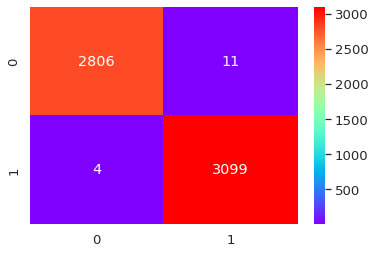

In [ ]:
## Performance Matrix
y_train_predict = CB_model.predict(X_train)
model_score =CB_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
# Confusion matrix training Data
cm_train_rf = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_rf, annot = True,fmt = 'd', cmap='rainbow')

0.9980299448384555
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1211
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      2538
   macro avg       1.00      1.00      1.00      2538
weighted avg       1.00      1.00      1.00      2538

Confusion Matrix


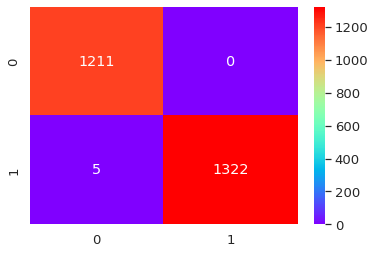

In [ ]:
## Performance Matrix
y_test_predict = CB_model.predict(X_test)
model_score = CB_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
# Confusion matrix test Data
cm_test_rf = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_rf, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


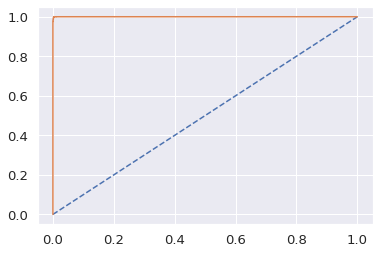

In [ ]:
# Memprediksi probabilitas
probs = CB_model.predict_proba(X_train)
# Mempertahankan probabilitas hanya untuk hasil positif
probs = probs[:, 1]
# Menghitung AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# Menghitung roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve
plt.plot(train_fpr, train_tpr)

AUC: 1.000


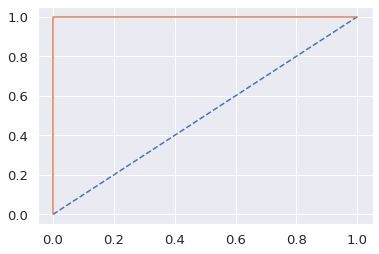

In [ ]:
# predict probabilities
probs = CB_model.predict_proba(X_test)
# Mempertahankan probabilitas hanya untuk hasil positif
probs = probs[:, 1]
# Menghitung AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# Menghitung roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve
plt.plot(test_fpr, test_tpr)

### K-Fold Cross Validation

In [57]:
# Memisahkan data menjadi Train dan Test
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [59]:
# Logistic Regression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9518518518518518

In [62]:
# SVC
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.28888888888888886

In [63]:
# Random Forest
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9703703703703703

In [64]:
score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.89482471 0.95325543 0.90984975]
Avg : 0.9193099610461881


In [70]:
# Set SVM and CV=3
score_svm =cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)
print(score_svm)
print('Avg :',np.average(score_svm))

[0.38063439 0.41068447 0.51252087]
Avg : 0.4346132442960489


In [71]:
# Set Random Forest and CV=3
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)
print(score_rf)
print('Avg :',np.average(score_rf))

[0.93489149 0.95659432 0.92153589]
Avg : 0.9376739009460211


- Random Forest sebelum K fold: 97%
- Random Forest setelah K fold (rata-rata): 93%

### Hyperparameter Tuning
Penyetelan hyperparameter adalah bagian penting dalam mengontrol perilaku model pembelajaran mesin. Jika kita tidak menyetel hyperparameter dengan benar, parameter model yang diestimasi menghasilkan hasil yang kurang optimal, karena tidak meminimalkan fungsi kerugian.

#### Hyperparameter Decision Tree Classifier





In [ ]:
model = tree.DecisionTreeClassifier() 
model.fit(X_train,y_train)
print('Train score: ' + str(model.score(X_train, y_train))) #recall
print('Test score:' + str(model.score(X_test, y_test))) #recall

Train score: 1.0
Test score:0.9531126871552403


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = tree.DecisionTreeClassifier()
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_train, y_train)

# Predict & Evaluation
dt_hyper = prediction(X_train, y_train, X_test, y_test, model, model_name='decision tree_hyperparam')
dt_hyper

{'test': {'model_name': 'decision tree_hyperparam',
  'recall': 0.8960060286360211,
  'precision': 0.9034954407294833,
  'roc_auc': 0.8955670110149552,
  'f1': 0.8997351494513809,
  'accuracy': 0.8955670110149552},
 'train': {'model_name': 'decision tree_hyperparam',
  'recall': 0.9436029648727038,
  'precision': 0.9525048796356539,
  'roc_auc': 0.9458873894296072,
  'f1': 0.9480330257406507,
  'accuracy': 0.9458873894296072},
 'y_test': array([0, 1, 0, ..., 0, 1, 0]),
 'y_test_pred': array([0, 0, 0, ..., 0, 1, 0]),
 'y_train': array([0, 0, 1, ..., 1, 0, 1]),
 'y_train_pred': array([0, 0, 1, ..., 1, 0, 1]),
 'clf': RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                    param_distributions={'max_depth': [1, 4, 8, 12, 16, 19, 23,
                                                       27, 31, 34, 38, 42, 46,
                                                       49, 53, 57, 61, 64, 68,
                                                       72, 76, 79, 83, 87, 91,

In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 34
Best min_samples_split: 10
Best min_samples_leaf: 4
Best max_features: sqrt


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #recall
print('Test score: ' + str(model.score(X_test, y_test))) #recallX

Train score: 0.9436029648727038
Test score: 0.8960060286360211


#### Hyperparameter Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
print('Train score: ' + str(rf.score(X_train, y_train))) #recall
print('Test score: ' + str(rf.score(X_test, y_test))) #recall

Train score: 1.0
Test score: 0.9783293932230103


In [ ]:
#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')

# Predict & Evaluation
rf_hyper = prediction(X_train, y_train, X_test, y_test, rf_tuned, model_name='random forest_hyperparam')
rf_hyper

{'test': {'model_name': 'random forest_hyperparam',
  'recall': 0.9856819894498869,
  'precision': 0.9710467706013363,
  'roc_auc': 0.9767386000098319,
  'f1': 0.9783096484667164,
  'accuracy': 0.9767386000098319},
 'train': {'model_name': 'random forest_hyperparam',
  'recall': 1.0,
  'precision': 1.0,
  'roc_auc': 1.0,
  'f1': 1.0,
  'accuracy': 1.0},
 'y_test': array([0, 1, 0, ..., 0, 1, 0]),
 'y_test_pred': array([0, 1, 0, ..., 0, 1, 0]),
 'y_train': array([0, 0, 1, ..., 1, 0, 1]),
 'y_train_pred': array([0, 0, 1, ..., 1, 0, 1]),
 'clf': RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                    param_distributions={'bootstrap': [True],
                                         'criterion': ['gini', 'entropy'],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110],
                                         'max_features': ['auto', 'sqrt',
        

In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


In [ ]:
print('Train score: ' + str(rf_tuned.score(X_train, y_train))) #recall
print('Test score: ' + str(rf_tuned.score(X_test, y_test))) #recall

Train score: 1.0
Test score: 0.9836233367451381


#### Hyperparameter CatBoost

In [ ]:
cat = cb.CatBoostClassifier(random_state=42, logging_level='Silent')
cat.fit(X_train,y_train)
print('Train score: ' + str(cat.score(X_train, y_train))) #recall
print('Test score: ' + str(cat.score(X_test, y_test))) #recall

Train score: 0.9983108108108109
Test score: 0.9775413711583925


In [ ]:
# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)]
                      )

# Init model
cat = cb.CatBoostClassifier(random_state=42,logging_level='Silent')
cat_tuned = RandomizedSearchCV(cat, hyperparameters, random_state=42, cv=5, scoring='recall')

# Predict & Evaluation
cat_hyper = prediction(X_train, y_train, X_test, y_test, cat_tuned, model_name='cat boost_hyperparam')

In [ ]:
show_best_hyperparameter(cat_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1000
Best learning_rate: 0.08436842105263158


In [ ]:
print('Train score: ' + str(cat_tuned.score(X_train, y_train))) #recall
print('Test score: ' + str(cat_tuned.score(X_test, y_test))) #recall

Train score: 1.0
Test score: 0.9917106254709872


# Evaluation

#### Metrik Kinerja
Akurasi bukanlah metrik kinerja utama dan faktanya dalam kasus dataset yang tidak seimbang, itu mungkin tidak sesuai sama sekali.
Mencoba berbagai metrik kinerja yang dapat memberikan lebih banyak wawasan tentang kinerja model. Di antara metrik ini adalah:
- Confusion Matrix: Matriks yang menunjukkan prediksi yang benar dan jenis prediksi yang salah yang dibuat
- Precision: Ukuran ketepatan pengklasifikasi.
- Recall: Ukuran kelengkapan pengklasifikasi.
- F1 Score (or F-score): Rata-rata tertimbang dari presisi dan daya ingat.

In [ ]:
model_1_result = prediction(X_train, y_train, X_test, y_test, tree.DecisionTreeClassifier(), model_name='decision tree')
model_2_result = prediction(X_train, y_train, X_test, y_test, cb.CatBoostClassifier(random_state=42, logging_level='Silent'), model_name='catboost')
model_3_result = prediction(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=42), model_name='random forest')

In [ ]:
pd.DataFrame([model_1_result['train'], 
              model_2_result['train'], 
              model_3_result['train']])

,model_name,recall,precision,roc_auc,f1,accuracy
0,decision tree,1.000000,1.000000,1.000000,1.000000,1.000000
1,catboost,0.998389,0.998389,0.998307,0.998389,0.998307
2,random forest,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pd.DataFrame([model_1_result['test'], 
              model_2_result['test'], 
              model_3_result['test']])

,model_name,recall,precision,roc_auc,f1,accuracy
0,decision tree,0.955988,0.940584,0.949015,0.948223,0.949015
1,xgboost,0.907881,0.937632,0.924962,0.922517,0.924962
2,catboost,0.970317,0.981366,0.976318,0.975811,0.976318
3,logistic regression,0.848516,0.896216,0.877107,0.871714,0.877107
4,random forest,0.985670,0.969789,0.978100,0.977665,0.978100
5,kNN,0.993859,0.876354,0.929641,0.931415,0.929641
6,adaboost,0.893552,0.915094,0.906992,0.904195,0.906992


In [ ]:
 print(classification_report(model_1_result['y_test'], model_2_result['y_test_pred']))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1211
           1       0.98      0.98      0.98      1327

    accuracy                           0.98      2538
   macro avg       0.98      0.98      0.98      2538
weighted avg       0.98      0.98      0.98      2538



#### Result Hyperparameter modeling

In [ ]:
pd.DataFrame([dt_hyper['train'], 
              rf_hyper['train'], 
              cat_hyper['train']
              ])

,model_name,recall,precision,roc_auc,f1,accuracy
0,decision tree_hyperparam,0.943603,0.952505,0.945887,0.948033,0.945887
1,random forest_hyperparam,1.000000,1.000000,1.000000,1.000000,1.000000
2,cat boost_hyperparam,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pd.DataFrame([dt_hyper['test'], 
              rf_hyper['test'], 
              cat_hyper['test']
              ])

,model_name,recall,precision,roc_auc,f1,accuracy
0,decision tree_hyperparam,0.896006,0.903495,0.895567,0.899735,0.895567
1,random forest_hyperparam,0.985682,0.971047,0.976739,0.978310,0.976739
2,cat boost_hyperparam,0.991711,0.981357,0.985533,0.986507,0.985533


#### Feature Importance

In [ ]:
# Random Forest Classifier
classifier = RandomForestClassifier(random_state = 42)

# Fit
classifier.fit(X, y)

# Feature importances
feature_importances = classifier.feature_importances_

# Membuat dataframe
feature_importances_df = pd.DataFrame({'feature': list(X.columns), 
'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances_df.head(10)

,feature,importance
0,Tenure,0.167932
14,std_Tenure,0.155421
13,CashbackAmount,0.050788
12,DaySinceLastOrder,0.047466
16,CashbackAmount_normalisasi,0.044908
18,DaySinceLastOrder_normalisasi,0.039920
17,NumberOfDeviceRegistered_normalisasi,0.036794
8,Complain,0.035969
20,MaritalStatus_Married,0.033686
7,NumberOfAddress,0.033213


In [ ]:
imp_column_list = list(feature_importances_df.head(10)['feature'].values)
imp_column_list

['Tenure',
 'std_Tenure',
 'CashbackAmount',
 'DaySinceLastOrder',
 'CashbackAmount_normalisasi',
 'DaySinceLastOrder_normalisasi',
 'NumberOfDeviceRegistered_normalisasi',
 'Complain',
 'MaritalStatus_Married',
 'NumberOfAddress']

#### Kesimpulan:
10 feature terpenting berdasarkan Random Forest Classifier, adalah:
- Tenure,
- std_Tenure,
- CashbackAmount,
- DaySinceLastOrder,
- CashbackAmount_normalisasi,
- DaySinceLastOrder_normalisasi,
- NumberOfDeviceRegistered_normalisasi,
- Complain,
- MaritalStatus_Married,
- NumberOfAddress.

In [ ]:
explainer = shap.Explainer(cat_hyper['clf'].predict, cat_hyper['x_test'])
shap_values_cat = explainer(cat_hyper['x_test'])

Permutation explainer: 2539it [04:32,  9.10it/s]


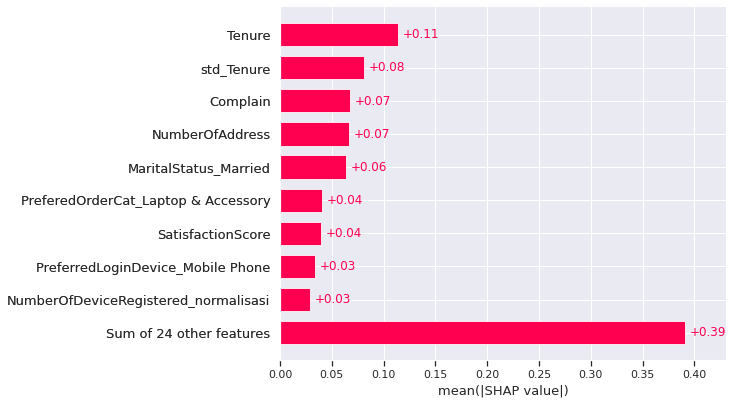

In [ ]:
shap.plots.bar(shap_values_cat)

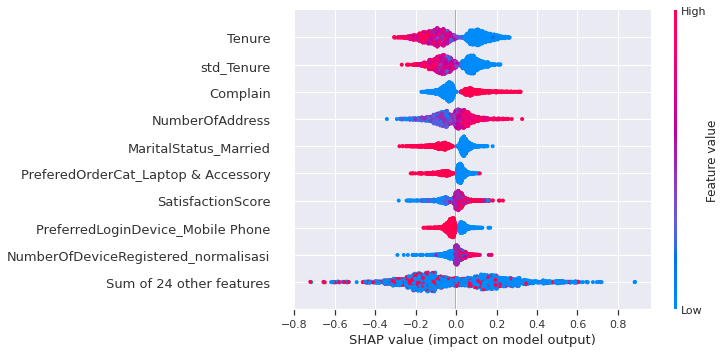

In [ ]:
shap.plots.beeswarm(shap_values_cat)

### Confusion Matrix
Confusion matrix adalah tabel yang digunakan untuk mendefinisikan kinerja dari algoritma klasifikasi. Sebuah matriks kebingungan memvisualisasikan dan merangkum kinerja algoritma klasifikasi.

In [ ]:
# Catboost
y_pred = cat_tuned.predict(X_test)
y_pred_train = cat_tuned.predict(X_train)

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[1186   25]
 [  11 1316]]


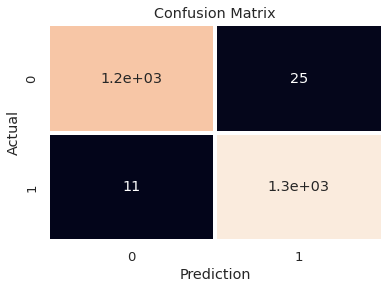

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=3,cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

In [ ]:
#Confusion Matrix Train
cf_matrix1 = confusion_matrix(y_train, y_pred_train)

print(cf_matrix1)

[[2817    0]
 [   0 3103]]


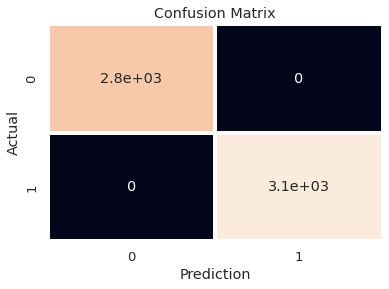

In [ ]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,linewidths=3,cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

### Business Insight


In [ ]:
#Data Visualization
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

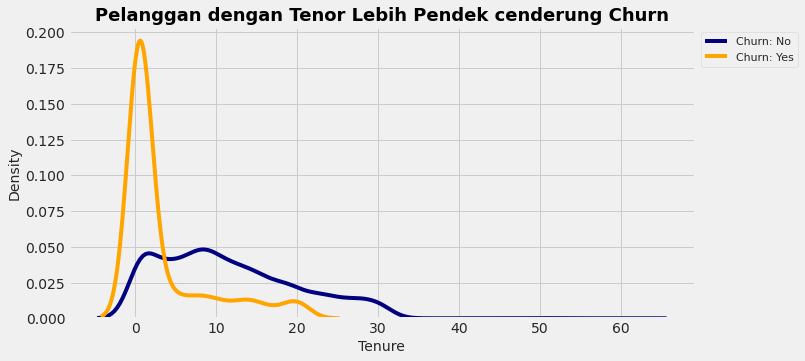

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df_insight[df_insight['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
sns.kdeplot(df_insight[df_insight['Churn'] == 1]['Tenure'].dropna(), color= 'orange', label= 'Churn: Yes', ax=ax)

ax.set_title('Pelanggan dengan Tenor Lebih Pendek cenderung Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Tenure', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)

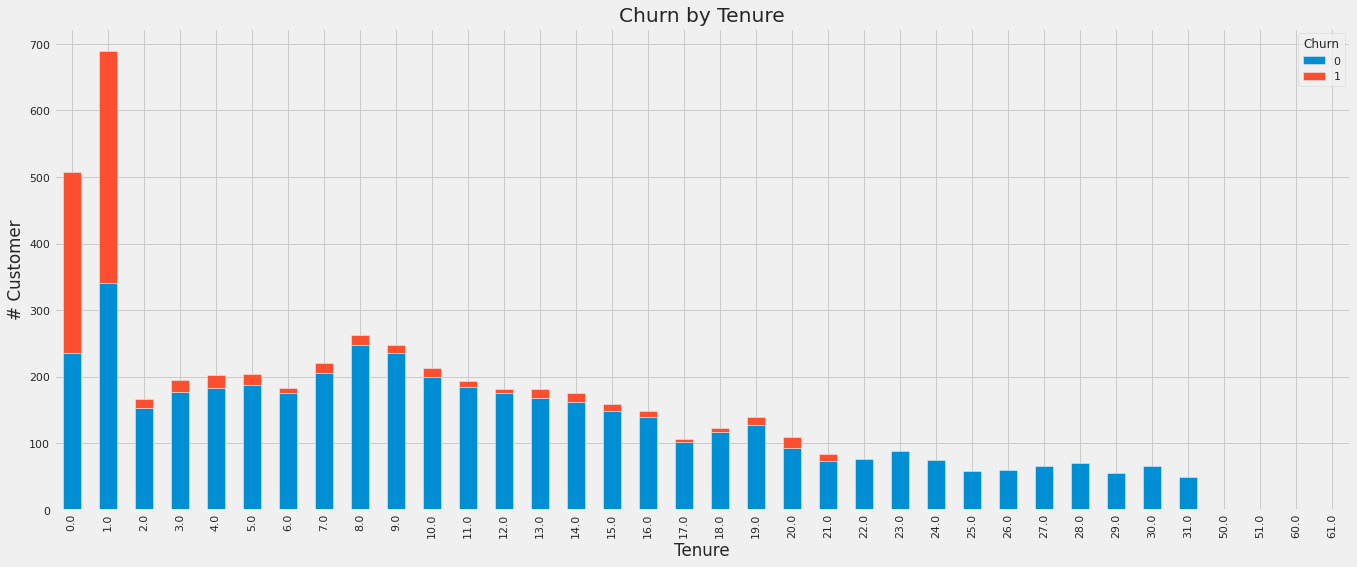

In [ ]:
int_churn_contingency = pd.crosstab(df_insight["Tenure"], df_insight["Churn"])
int_churn_contingency.plot(kind = 'bar', stacked = 'true', title = "Churn by Tenure")
int_churn_contingency
plt.xlabel('Tenure')
plt.ylabel('# Customer')
plt.show()

In [ ]:
group_by_complain = df_insight.groupby(['PreferedOrderCat','Complain']).agg({'CustomerID':'nunique'}).reset_index()
group_by_complain['Complain'] = group_by_complain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

group_by_complain2 = df_insight.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
group_by_complain3 = group_by_complain.merge(group_by_complain2, how='left',
              on='PreferedOrderCat')

group_by_complain3.columns = ['PreferedOrderCat','Complain','Num_Customer','AllCustomer']
group_by_complain3['Ratio'] = (group_by_complain3['Num_Customer'] / group_by_complain3['AllCustomer'] * 100.0).round(2)
group_by_complain3#

,PreferedOrderCat,Complain,Num_Customer,AllCustomer,Ratio
0,Fashion,Not Complain,584,826,70.70
1,Fashion,Complain,242,826,29.30
2,Grocery,Not Complain,284,410,69.27
3,Grocery,Complain,126,410,30.73
4,Laptop & Accessory,Not Complain,1492,2050,72.78
5,Laptop & Accessory,Complain,558,2050,27.22
6,Mobile,Not Complain,573,809,70.83
7,Mobile,Complain,236,809,29.17
8,Mobile Phone,Not Complain,897,1271,70.57
9,Mobile Phone,Complain,374,1271,29.43


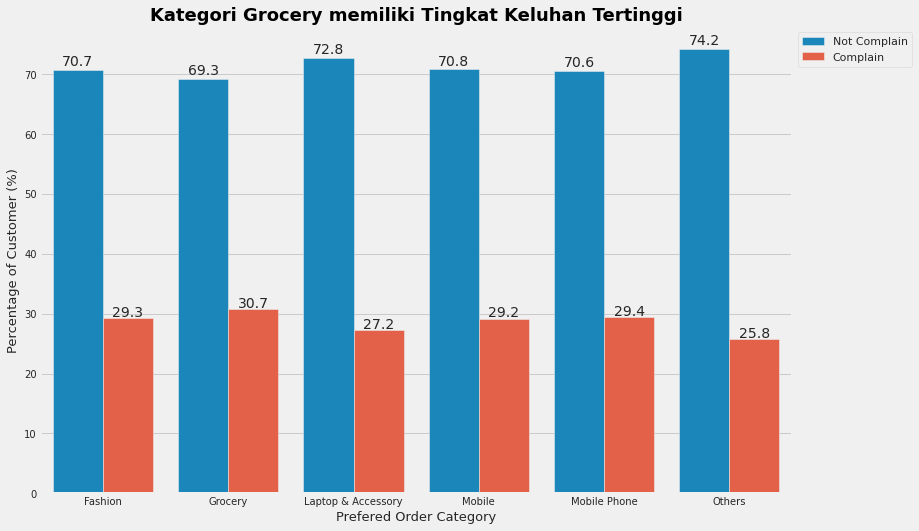

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=group_by_complain3, x='PreferedOrderCat', y='Ratio', hue='Complain')
plt.title('Kategori Grocery memiliki Tingkat Keluhan Tertinggi', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Prefered Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

In [ ]:
churn_by_complain = df_insight.groupby(['Churn','Complain']).agg({'CustomerID':'nunique'}).reset_index()
churn_by_complain['Complain'] = group_by_complain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})
churn_by_complain

,Churn,Complain,CustomerID
0,0,Not Complain,3586
1,0,Complain,1096
2,1,Not Complain,440
3,1,Complain,508


In [ ]:
df_new = df_insight.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
df_new1=df_insight.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
df_new2 = df_new1.merge(df_new, how='left',on='PreferedOrderCat')

df_new2.columns = ['PreferedOrderCat','Churn','Num_Customer','AllCustomer']
df_new2['Ratio'] = (df_new2['Num_Customer'] / df_new2['AllCustomer'] * 100.0).round(2)
df_new2

,PreferedOrderCat,Churn,Num_Customer,AllCustomer,Ratio
0,Fashion,0,698,826,84.50
1,Fashion,1,128,826,15.50
2,Grocery,0,390,410,95.12
3,Grocery,1,20,410,4.88
4,Laptop & Accessory,0,1840,2050,89.76
5,Laptop & Accessory,1,210,2050,10.24
6,Mobile,0,589,809,72.81
7,Mobile,1,220,809,27.19
8,Mobile Phone,0,921,1271,72.46
9,Mobile Phone,1,350,1271,27.54


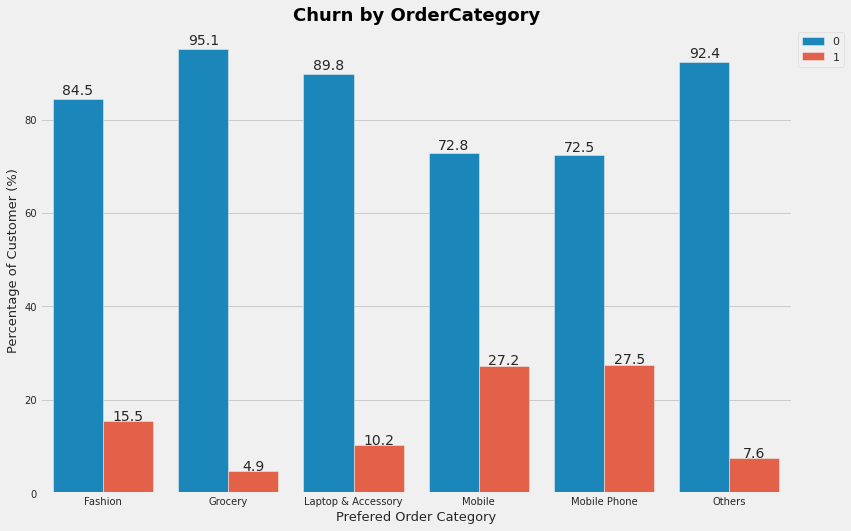

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_new2, x='PreferedOrderCat', y='Ratio', hue='Churn')
plt.title('Churn by OrderCategory', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Prefered Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

### Kesimpulan:
- Insight 1:
 - Pelanggan dengan tenor rendah (2 bulan pertama) memiliki potensi churn yang jauh lebih tinggi daripada pelanggan dengan tenor menengah ke atas.
 - Rekomendasi: Memberikan promosi kepada nasabah dengan tenor < 2 bulan.
- Insight 2:
 - Persentase churn karena keluhan pelanggan (31,67%) hampir 3 kali lebih besar dari persentase total churn pelanggan yang tidak mengeluh (10,93%).
 - Rekomendasi: Memberikan layanan customer care yang lebih baik.
- Insight 3:
 - Persentasi churn karena kebutuhan sehari-hari (95.15)
 - Rekomendasi: Memberikan insentif untuk pembelian barang kebutuhan sehari-hari, seperti bundling, buy 2 get 1 dll. 


# Deployment

### Pada tahap ini adalah kegiatan pembuatan laporan akhir dan rencananya model di deploy menggunakan Streamlit

